# Motorized Vehicles: Data Science Challenge

Based on the E-Bike Survey Response Results from TO Open Data, the goal is to train a model to predict whether the responder will answer "No - I do not have access to a private motorized vehicle" to the question "Does your household have access to any of the following types of private motorized vehicles?". 

Clearly, since the goal is to predict whether the output for this feature is a given category, this is a problem of classification. The dataset is labelled (since we have access to survey respones to that question), and hence it is a supervised learning classification problem.

The following notebook will cover the entire Data Science process, starting from loading the data, cleaning it, doing exploratory data analysis, creating a classification model and finally, evaluating the model.

## Data Import & First Look

Let's start by importing any necessary modules we need for data manipulation.

In [4257]:
# Import necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4258]:
# Read in survey data
responses = pd.read_csv("E-Bike_Survey_Responses.csv")

In [4259]:
# Take a look at available features + responses
responses.head(10)

,Timestamp,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,...,Do you support any of the following statements?,When you use Toronto's Multi-Use Trails do you mostly,Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?,Have you witnessed a collision or conflict on a trail between,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined,When you use Toronto's bicycle lanes do you mostly,Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined,With regards to illegal use of bicycles and e-bikes on sidewalks should the City,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City
0,2013-04-10 12:10,35 to 49,Male,Good,Post graduate,$100K+,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,...,On scooter type e-bikes the pedals are unneces...,drive a motor propelled e-bike,No,pedestrians and/or runners a conflict relating...,No - the trails are fine as they are,The bylaw should be modified to allow any kind...,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,be tolerant of bikes and e-bikes on the walksi...,Institute a speed limit for sidewalks
1,2013-04-10 12:30,18 to 34,Male,Excellent,University degree,$40K to $59K,Full Time,Central Toronto York or East York,10 - 20 km,30 - 44 minutes,...,On scooter type e-bikes the pedals are unneces...,I very rarely use any of Toronto's Multi-Use P...,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,No changes are necessary to the existing bylaw,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,maintain the existing programs for signage edu...,Do nothing
2,2013-04-10 12:33,50 to 64,Male,Good,University degree,$40K to $59K,Self Employed,Central Toronto York or East York,10 - 20 km,15 minutes or less,...,Most scooter type e-bikes are wider than a bic...,cycle I very rarely use any of Toronto's Multi...,No,I am not aware of any conflicts on the trails,Yes - more signage Yes - more enforcement (tic...,No changes are necessary to the existing bylaw,ride a road bicycle or a fixie,No changes are necessary to the existing bylaw,increase signage increase enforcement increase...,only wheelchairs at walking speed
3,2013-04-10 12:52,50 to 64,Male,Good,4 years university no degree,$80K to $99K,Self Employed,Central Toronto York or East York,Under 2 km,15 minutes or less,...,On scooter type e-bikes the pedals are unneces...,cycle,No,a conflict between cyclists and pedestrians a ...,Yes - more signage Yes - more enforcement (tic...,Motorized vehicles should generally not be all...,ride a commuter or cruiser style bicycle,Motorized vehicles should generally not be all...,increase signage increase enforcement,Update the definition of a personal mobility d...
4,2013-04-10 13:24,18 to 34,Male,Very good,College or trade school diploma,$40K to $59K,Self Employed,Central Toronto York or East York,5 - 10 km,15 minutes or less,...,Most scooter type e-bikes are wider than a bic...,cycle I very rarely use any of Toronto's Multi...,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,Motorized vehicles should generally not be all...,ride a road bicycle or a fixie,Motorized vehicles should generally not be all...,maintain the existing programs for signage edu...,Upda

**Note: ** Looking at the above dataframe, we can see that there's 22 different columns/features of data, each one corresponding to a different survey question. Since Pandas shortens the df to fit the given view, let's look at the complete list of columns below.



In [4260]:
responses.columns

Index([u'Timestamp', u'What age range do you fall in?', u'Sex',
       u'How would you describe your level of physical health?',
       u'What level of education have you reached?',
       u'What is your household income?',
       u'Which category best describes your employment?',
       u'What Toronto district is your primary address located in?',
       u'On average what distance do you travel most days of the week?',
       u'On average how long is your commute?',
       u'Which transportation option do you end up using most often?',
       u'Does your household have access to any of the following private motorized vehicles?',
       u'Do you support any of the following statements?',
       u'When you use Toronto's Multi-Use Trails do you mostly',
       u'Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?',
       u'Have you witnessed a collision or conflict on a trail between',
       u'Do you think more should be done to manage trail users who do not respect t

The target/output variable ("Does your household have access to any of the following private motorized vehicles?") is one of the given columns (Column # 10 to be precise). The remaining variables will be the *feature variables* used to train the model. 

Noticing that almost all the questions are *categorical* in nature (meaning they take on a fixed value from a given set of multiple possiblities), let's take a look at all the possible values that each category can have:

In [4261]:
responses.describe()

,Timestamp,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,...,Do you support any of the following statements?,When you use Toronto's Multi-Use Trails do you mostly,Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?,Have you witnessed a collision or conflict on a trail between,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined,When you use Toronto's bicycle lanes do you mostly,Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined,With regards to illegal use of bicycles and e-bikes on sidewalks should the City,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City
count,2238,2234,2221,2227,2220,2178,2223,2237,2237,2237,...,2238,2238,2238,2238,2237,2238,2238,2238,2238,2232
unique,1722,5,12,12,24,6,33,68,5,6,...,534,89,2,221,134,25,69,258,224,81
top,2013-04-12 11:19,35 to 49,Male,Very good,University degree,$100K+,Full Time,Central Toronto York or East York,5 - 10 km,16 - 29 minutes,...,scooter style e-bikes are different than pedal...,cycle,No,I am not aware of any conflicts on the trails,No - the trails are fine as they are,No changes are necessary to the existing bylaw,ride a commuter or cruiser style bicycle,No changes are necessary to the existing bylaw,maintain the existing programs for signage edu...,Update the definition of a personal mobility d...
freq,7,863,1554,891,895,831,1405,1634,847,782,...,84,738,1131,847,646,811,705,664,493,1379


There's a few things we can immediately observe:

**1) Missing Values**

The total number of values/responses should be 2238, but many columns have a total # of responses less than this. This will need to be dealt with during cleaning.

**2) Unique Values**

Notice that each of the questions have a varying set of possible responses. Whereas the survey probably only lists a few given options, those answering likely have responded outside of those given options. For example, a few questions have a pretty small/contained set of answers (Age Range - 5 possible types of values, likely the different age ranges), whereas in contrast categories like Education or Support of Statements have a large variance in type of input. This will also need to be dealt with during cleaning.

Having identified these issues and taken a first look at the data, we can now start the data cleaning process.

## Data Cleaning

Like every Data Science process, the most important and time-consuming segment is cleaning the data and getting it ready for modelling. Since there's 22 total features (21 - X, 1 - Y), this will take some time but it is vital. 


### Target Variable

Let's start with the target variable, which is the responses to the question * "Does your household have access to any of the following private motorized vehicles?"*

Looking at the range of input responses:

In [4262]:
responses["Does your household have access to any of the following private motorized vehicles?"].value_counts()

Yes - a car SUV truck or van                                                                                                                 1146
No - I do not have access to a private motorized vehicle                                                                                      522
Yes a motorcycle                                                                                                                              162
Yes - a pedal assist type e-bike                                                                                                               99
Yes - a scooter style e-bike                                                                                                                   85
Yes - a car SUV truck or van Yes a motorcycle                                                                                                  25
Yes - a car SUV truck or van Yes - a scooter style e-bike                                                                   

We can see that although a majority of responses fall under a small set of values (either No, pedal assist type e-bike, scooter style e-bike, car SUV truck or van, Autoshare or limited speed motorcycle), there are a large number of values (approx. 140 values) that do ** not ** fit the given standard.

These need to be intelligently dealt with/filtered, with some heurestics.

Let's start with the basics:

1) If the response is "No - I do not have access to a private motorized vehicle", we assign it a value of 0

2) One hypothesis I have is that if the response contains the word "Yes", it implies that they have access to some type of private motorized vehicle, and the resulting value is a 1. To test this hypothesis, let's look at the above *value_counts()* call, and all the values that have the word "Yes" in them:

In [4263]:
Y = responses["Does your household have access to any of the following private motorized vehicles?"]
Y[Y.str.contains("Yes")]

0                            Yes - a scooter style e-bike
1                            Yes - a scooter style e-bike
2                            Yes - a car SUV truck or van
3                            Yes - a car SUV truck or van
4                            Yes - a car SUV truck or van
6                                        Yes a motorcycle
7                            Yes - a car SUV truck or van
8                            Yes - a car SUV truck or van
9                            Yes - a car SUV truck or van
11                           Yes - a car SUV truck or van
13                           Yes - a car SUV truck or van
15                           Yes - a car SUV truck or van
16                           Yes - a car SUV truck or van
18                           Yes - a car SUV truck or van
19                           Yes - a car SUV truck or van
20                           Yes - a car SUV truck or van
21                           Yes - a car SUV truck or van
22            

Given the above list + the original *value_counts()*, it's fair to say that the hypothesis does work. It's important to note the underlying assumption asssumes a "Yes" for this type of response (Yes - a car SUV truck or van No - I do not have access to a private motorized vehicle). This response, where the user has given both options, only occurs twice (as seen in *value_counts()*), and thus setting that to a Yes should be okay.

After applying this rule, there's still quite a few values that are left out (probably to do with car rentals + people who didn't know how to deal with multiple options). Let's take a look:

In [4264]:
# Rule 1: If they said no -> Set value to 0
Y[Y == "No - I do not have access to a private motorized vehicle"] = 0
Y[Y == "No - I do not own a private motorized vehicle"] = 0

# Rule 2: If their response contains the word Yes -> Set value to 1
Y[Y.str.contains("Yes").fillna(False)] = 1

# Check out remaining data
Y[Y != 0][Y != 1]

40      also motorcycle - not allowing more than one c...
44                                   No - only autoshare 
45                   I can borrow a car from time to time
72                                              Autoshare
132     The author of this survey is a fuk'g idiot how...
143                                             Car share
156                               Car van motorcycle bike
168     will only let you choose one so i will choose ...
306                                             Autoshare
316                                         Car and Vespa
341                                    AutoShare vehicles
372                      car and limited speed motorcycle
393                                             autoshare
422     Please note that this form does not allow the ...
461                                                zipcar
499                                           Car-sharing
503                     can't choose ore than on the form
518           

Having gone through the dataset and cleaned a bulk of the data, it's clear that from what's remaining, there are a few standouts:

1. Car Rental (Autoshare, Car2Go, Car Sharing, Rent/Borrow)
2. People who have listed multiple vehicles

For the purpose of this study, I'm assuming that a car rental/sharing service does **not count as the household having access to a motorized vehicle**. Thus, it will be mapped to a value of 0 (representing a "No"). Detecting this as a response also needs to be done intelligently, since there are string variants of the terms present throughout the dataset (i.e. Autoshare vs. autoshoare, Car2Go vs. Cars2Go etc.)

For those that have listed multiple vehicles, this should be mapped to a value of 1 (representing a "Yes" to the question). Clearly from the numerous mentions regarding not being able to submit multiple options, this is a point of improvement for the form that will be discussed in the analysis section.

Let's try and clean this remaining data

In [4265]:
Y.value_counts()

1                                                                                                                                            1605
0                                                                                                                                             523
Autoshare                                                                                                                                       9
car share                                                                                                                                       4
car and motorcycle                                                                                                                              3
SUV and motorcycle                                                                                                                              2
car rental                                                                                                                  

In [4266]:
# Autoshare
Y[Y.str.contains("Autoshare") | Y.str.contains("AutoShare") | Y.str.contains("autoshare") | Y.str.contains("AUTOSHARE")] = 0

# Zipcar
Y[Y.str.contains("Zipcar") | Y.str.contains("zipcar") | Y.str.contains("zip car") | Y.str.contains("ZIPCAR")] = 0

# Car2Go
Y[Y.str.contains("Car2Go") | Y.str.contains("car2go") | Y.str.contains("Cars2Go") | Y.str.contains("CAR2GO") | Y.str.contains("cars2go")] = 0

# Car rental
Y[Y.str.contains("rent").fillna(False)] = 0

# Car sharing
Y[Y.str.contains("shar").fillna(False)] = 0

# Car borrowing
Y[Y.str.contains("borrow").fillna(False)] = 0

Y.value_counts()

1                                                                                                                                            1605
0                                                                                                                                             568
car and motorcycle                                                                                                                              3
SUV and motorcycle                                                                                                                              2
car & motorcycle                                                                                                                                2
Car and motorcycle                                                                                                                              2
2 Cars 2 motorcycles and 1 scooter                                                                                          

To complete this cleaning, based on the above responses a fair assumption is that the remaining answers all correspond to the multiple vehicles category. There are responders who have left comments regarding the inavailability of multiple options, and for them, I'm assuming that they require multiple options (and hence, have access to a private motorized vehicle).

This assumption for the remaining values works really well, the only possible edge case being the entry "Considering an e-bike", in which case it can be written off as a false negative (statistically, the error is fairly insiginificant because of the massive ratio of 1's to 0's).

Completing the target variable cleaning:

In [4267]:
# Assume remaining values correspond to multiple vehicles -> YES
Y[(Y != 0) & (Y != 1)] = 1
Y.value_counts()

1    1670
0     568
Name: Does your household have access to any of the following private motorized vehicles?, dtype: int64

### Feature Variables

Having prepared the target variable, we now need to go through each feature variable and clean it accordingly. Let's start with age range, and make our way through the different features.

#### Time Stamp

The time that the survey has been taken seems completely irrelevant to the end classification goal, which is predicting whether they have accesss to any private motorized vehicles. In order to avoid overfitting, we must remove irrelevant features like this:

In [4268]:
responses.drop("Timestamp", axis = 1, inplace = True)

#### Age Range

Looking at the different age ranges, and the given number of values:

In [4269]:
ageRange = responses["What age range do you fall in?"]
ageRange.value_counts()

35 to 49            863
18 to 34            789
50 to 64            463
65 years or more    111
17 or younger         8
Name: What age range do you fall in?, dtype: int64

In [4270]:
ageRange.describe()

count         2234
unique           5
top       35 to 49
freq           863
Name: What age range do you fall in?, dtype: object

From the above information, we can see that the 5 available age ranges are:

1. 17 or younger
2. 18 to 34
3. 35 to 49
4. 50 to 64
5. 65 years or more

Since there's only 5 unique values in the dataset, we know that there isn't an issue with erroneous / invalid age ranges. However, instead of 2238 values we have 2234. Thus, we're **missing 4 values**. These numbers can be filled in simply by following the existing distribution in ages.

As seen above, a majority of survey responders fall within the 18 to 34 / 35 to 49 categories (it's almost an equal split, 863 - 789). Thus, in order to fill the missing values we can just follow this distribution and assign 2 values to the 18 to 34 bucket, and another 2 to the 35 to 49 bucket. This ensures that we aren't meddling with the inherent distribution in the data.

This can also be done in other ways (i.e creating a pivot table and looking at other factors like Education & Employment to determine Age Range), however since it's only 4 values within a dataset of 2238, this simple method will work well!

In [4271]:
# Locate missing values
ageRange[ageRange.isnull()]

# Fill them in - 18 to 34
ageRange[782] = "18 to 34"
ageRange[845] = "18 to 34"

# Fill them in - 35 to 49
ageRange[868] = "35 to 49"
ageRange[1931] = "35 to 49"

ageRange.describe()

count         2238
unique           5
top       35 to 49
freq           865
Name: What age range do you fall in?, dtype: object

Since this variable is categorical in nature, we should also map it to be a numerical value so that we can use it with our machine learning model. This can be done via a simple mapping:

0 - 17 or younger
    
1 - 18 to 34
    
2 - 35 to 49
    
3 - 50 to 64
    
4 - 65 years or more

In [4272]:
# Mapping categories to numbers
ageRange[ageRange == "17 or younger"] = 0
ageRange[ageRange == "18 to 34"] = 1
ageRange[ageRange == "35 to 49"] = 2
ageRange[ageRange == "50 to 64"] = 3
ageRange[ageRange == "65 years or more"] = 4

ageRange.value_counts()

2    865
1    791
3    463
4    111
0      8
Name: What age range do you fall in?, dtype: int64

#### Sex

Similarly, let's take a look at the distribution of values for the gender/sex category.

In [4273]:
gender = responses["Sex"]
gender.value_counts()

Male                       1554
Female                      657
Genderqueer                   1
Irrelevant                    1
please                        1
Transgender                   1
trans                         1
Trans Female                  1
they                          1
unspecified                   1
prefer not to disclose        1
fifth                         1
Name: Sex, dtype: int64

In [4274]:
gender.describe()

count     2221
unique      12
top       Male
freq      1554
Name: Sex, dtype: object

There are two issues here:

1. Missing values (2221 total values instead of 2238)
2. Unspecified/Other genders

Missing values can be dealt similarly to how it was dealt above, by following the distribution in the data. In this case, the survey is heavily male dominant (1554 Males to 657 Females) and thus the remaining 17 values can be added as "Males" without skewing the existing data.

There are 10 other unique values that responders have provided, ranging from "Transgender" to "Prefer not to disclose". All of these can be grouped under one "Other category" to simplify analysis.

In [4275]:
# Fill in missing values
gender[gender.isnull()] = "Male"
gender.describe()

count     2238
unique      12
top       Male
freq      1571
Name: Sex, dtype: object

In [4276]:
# Group all other genders (other than Male/Female) into their own "Other" category
gender[(gender != "Male") & (gender != "Female")] = "Other/Unspecified"
gender.value_counts()

Male                 1571
Female                657
Other/Unspecified      10
Name: Sex, dtype: int64

Converting to a numerical feature, we will map the categories like so:

0 - Male

1 - Female

2 - Other/Unspecified


In [4277]:
gender[gender == "Male"] = 0
gender[gender == "Female"] = 1
gender[gender == "Other/Unspecified"] = 2

gender.value_counts()

0    1571
1     657
2      10
Name: Sex, dtype: int64

#### Physical Health

Let's observe the distribution of values for physical health:

In [4278]:
physicalHealth = responses["How would you describe your level of physical health?"]
physicalHealth.value_counts()

Very good                                    891
Good                                         667
Excellent                                    411
Fairly good                                  210
Poor                                          41
healing fractured heel                         1
Disabled                                       1
need knee replacement                          1
In poor shape but active & improving           1
healthy but with arthritis mobilty issues      1
Back Injury                                    1
Obese diabetic but trying to be healthy        1
Name: How would you describe your level of physical health?, dtype: int64

In [4279]:
physicalHealth.describe()

count          2227
unique           12
top       Very good
freq            891
Name: How would you describe your level of physical health?, dtype: object

Judging from the above categories, there seems to be the following hiearchy of buckets/values (this is the assumed distribution moving forward):

Disabled -> Poor -> Fairly good -> Good -> Very good -> Excellent

The disabled category is assumed to include responders that are either permanently or temporarily disabled (via an injury / illness / health impairment). 

With regards to issues with this feature, the same two problem persist:

1. Missing Values (2227 as opposed to 2238)
2. Unique Values (most of which fall under the disabled category -> easy to deal with)

Dealing with the missing values can be done in the same manner as done so far, by following the given distribution in the data (since the number of missing values is pretty small, only 11). As seen above, a majority of responders report themselves in "Very good" shape, or "Good" shape. There's approximately twice as many people that reported being in "Excellent" shape, as opposed to "Fairly good" shape. Following this distribution, we can fill out 4/11 values as "Very good", 3/11 values as "Good", 2 values as "Excellent", and one each for "Fairly good" and "Poor". The goal is to distribute values in a way that produces the least amount of skew in the existing distribution. Let's do this:

In [4280]:
# Locate missing values
physicalHealth[physicalHealth.isnull()]

# Update missing values based on distribution
physicalHealth[215] = "Very good"
physicalHealth[357] = "Very good"
physicalHealth[555] = "Very good"
physicalHealth[782] = "Very good"

physicalHealth[868] = "Good"
physicalHealth[1079] = "Good"
physicalHealth[1131] = "Good"

physicalHealth[1656] = "Excellent"
physicalHealth[1693] = "Excellent"

physicalHealth[1931] = "Fairly good"

physicalHealth[2076] = "Poor"

physicalHealth.describe()

count          2238
unique           12
top       Very good
freq            895
Name: How would you describe your level of physical health?, dtype: object

In [4281]:
physicalHealth.value_counts()

Very good                                    895
Good                                         670
Excellent                                    413
Fairly good                                  211
Poor                                          42
healing fractured heel                         1
Disabled                                       1
need knee replacement                          1
In poor shape but active & improving           1
healthy but with arthritis mobilty issues      1
Back Injury                                    1
Obese diabetic but trying to be healthy        1
Name: How would you describe your level of physical health?, dtype: int64

In [4282]:
# Single edge case: belongs to Poor category
physicalHealth[physicalHealth == "In poor shape but active & improving"] = "Poor"

# Remaining entries can be filed as Disabled
physicalHealth[(physicalHealth != "Very good") & (physicalHealth != "Fairly good") & (physicalHealth != "Good") & (physicalHealth != "Excellent") & (physicalHealth != "Poor")] = "Disabled"
physicalHealth.value_counts()

Very good      895
Good           670
Excellent      413
Fairly good    211
Poor            43
Disabled         6
Name: How would you describe your level of physical health?, dtype: int64

Like always, we need to convert these categories to numeric values in order to use them. We will map the categories like so:

0 - Disabled

1 - Poor

2 - Fairly good

3 - Good

4 - Very good

5 - Excellent

In [4283]:
physicalHealth[physicalHealth == "Disabled"] = 0
physicalHealth[physicalHealth == "Poor"] = 1
physicalHealth[physicalHealth == "Fairly good"] = 2
physicalHealth[physicalHealth == "Good"] = 3
physicalHealth[physicalHealth == "Very good"] = 4
physicalHealth[physicalHealth == "Excellent"] = 5

physicalHealth.value_counts()

4    895
3    670
5    413
2    211
1     43
0      6
Name: How would you describe your level of physical health?, dtype: int64

#### Education


In [4284]:
education = responses["What level of education have you reached?"]
education.value_counts()

University degree                                    895
Post graduate                                        591
College or trade school diploma                      521
High school diploma                                  192
Some university                                        2
Professional Certifications                            1
college degree (not university and not a diploma)      1
Grade 9                                                1
Graduate                                               1
still in school                                        1
in HS                                                  1
Professional degree                                    1
University Student                                     1
university                                             1
M D                                                    1
working towards OSSD                                   1
some university                                        1
some uni                       

In [4285]:
education.describe()

count                  2220
unique                   24
top       University degree
freq                    895
Name: What level of education have you reached?, dtype: object

As we can see above, there is a quite a bit of variability in the answers provided. There are also 18 missing values in the data, although if we follow the distribution these values will not be difficult to fill in.

The primary issue with the Education category is dealing with the variability in responses. Some of the responses include people who dropped out of high school, others are currently students (either in high school or in university). 

Here, an assumption is made that the question "What level of education have you reached?" implies/equals "What is the highest degree of education/schooling you have **attained/completed?**". The latter is typical wording for a question of this nature, and it allows you to group existing students into buckets as well (for example: a University student has attained a High School Diploma). Thus, there's also room for improvement with regards to the question in this category.

Note that we're also assuming that professional/online certifications do **not** count as a formal "education" level/category.

Given this information, the set of categories that can be created are:

1. Postgraduate (implies a Masters, PhD, M.D., Law etc)
2. University degree
3. College or Trade School Diploma
4. High School Diploma (OSSD or equivalent)
5. No formal educational credential (implies that the responder is still a high school student, or had dropped out)

Let's see if we can get this:

In [4286]:
# Filter existing students
education[(education.str.contains("student", False).fillna(False)) & (education.str.contains("University", False))] = "High school diploma "
education[(education.str.contains("student", False).fillna(False)) & (education.str.contains("High school", False))] = "No formal educational credential"

education[education.str.contains("in", False).fillna(False) & ((education.str.contains("HS", False)) | (education.str.contains("school", False)) | (education.str.contains("OSSD", False)))] = "No formal educational credential"
education.value_counts()

University degree                                    895
Post graduate                                        591
College or trade school diploma                      521
High school diploma                                  193
No formal educational credential                       4
Some university                                        2
Professional Certifications                            1
college degree (not university and not a diploma)      1
Grade 9                                                1
Graduate                                               1
Professional degree                                    1
university                                             1
M D                                                    1
Law School                                             1
some university                                        1
some uni                                               1
PhD                                                    1
4 years university no degree   

In [4287]:
# Look at university graduates
education[((education.str.contains("university", False)) | (education.str.contains("uni", False))) & (education != "University degree")]

3                            4 years university no degree
630                                       Some university
764     college degree (not university and not a diploma)
880                                       Some University
1712                                      some university
1784                                           university
1787                                      Some university
2048                                             some uni
Name: What level of education have you reached?, dtype: object

From the above breakdown, we can see two edge cases:

1. 4 years university no degree (should be classified as a high school diploma)
2. College Degree (not university and not a diploma)

The second category is a tricky response, and essentially a design decision as to which category it should fall under. Since generally degree's are a higher form of education / higher education level in comparison to diplomas (regardless of whether it's achieved from a university or a college), I'm assuming that this should fall under the "University degree" category.

Let's deal with these edge cases (again, ideally the survey question should be changed to better the input responses, or the edge case filtering can be done more intelligently, but for the sake of brevity we can deal with these 2 cases individually).

In [4288]:
# Deal with one-offs / edge cases
education[3] = "High school diploma "
education[764] = "University degree"
education[((education.str.contains("university", False)) | (education.str.contains("uni", False)) | (education.str.contains("graduate", False))) & (education != "University degree") & (education != "Post graduate")]

630     Some university
689            Graduate
880     Some University
1712    some university
1784         university
1787    Some university
2048           some uni
Name: What level of education have you reached?, dtype: object

In [4289]:
# Assuming that responders that have put "some university/uni" or "graduate" are graduates from that/a university
education[((education.str.contains("university", False)) | (education.str.contains("uni", False)) | (education.str.contains("graduate", False))) & (education != "University degree") & (education != "Post graduate")] = "University degree"
education.value_counts()

University degree                   903
Post graduate                       591
College or trade school diploma     521
High school diploma                 194
No formal educational credential      4
Professional Certifications           1
Law School                            1
PhD                                   1
M D                                   1
Professional degree                   1
Grade 9                               1
Grade 8                               1
Name: What level of education have you reached?, dtype: int64

Having done a bulk of the filtering, now the only unique values left either correspond to post graduate programs (i.e. PhD, M.D, LLB etc.) or those with no formal educational credential (i.e. Professional certification, high school dropouts etc.).

Note that ideally, doctorate programs should be their own category. It doesn't make sense to add that category now however, since it's impossible to tell how many responders that responded with "Post graduate" held doctorate degrees (and wrote that down as the best possible answer). This is another point of improvement for the survey.

In [4290]:
# Classify doctorate/post graduate programs
education[(education.str.contains("PhD", False)) | (education.str.contains("M D", False)) | (education.str.contains("Law School", False))] = "Post graduate"
education.value_counts()

University degree                   903
Post graduate                       594
College or trade school diploma     521
High school diploma                 194
No formal educational credential      4
Professional Certifications           1
Professional degree                   1
Grade 9                               1
Grade 8                               1
Name: What level of education have you reached?, dtype: int64

In [4291]:
# Classify remaining as "No formal educational credential"
education[(education != "University degree") & (education != "Post graduate") & (education != "College or trade school diploma") & (education != "High school diploma ") & (education != "No formal educational credential") & (education.notnull())] = "No formal educational credential"
education.value_counts()

University degree                   903
Post graduate                       594
College or trade school diploma     521
High school diploma                 194
No formal educational credential      8
Name: What level of education have you reached?, dtype: int64

Having dealt with the variability in input, we now need to go in and fill missing values. Again, this can be done in numerous ways, like looking at other categories, ie. Income or Employment and inferring the education. However, inferrence based methods are both complex (for the given number of missing values, it doens't necessarily make sense) and also require the other categories to be clean data (which isn't true).

Hence, we'll follow the method of using the existing distribution of data to our advantage. Currently, there's an overwhelming majority of responders that have university degrees. Twice as many responders have university degrees, in comparison to those with post graduate degrees or college diplomas. Following this distribution, we get:

In [4292]:
# Locate missing values
education[education.isnull()]

232     NaN
245     NaN
491     NaN
782     NaN
805     NaN
845     NaN
868     NaN
877     NaN
887     NaN
1058    NaN
1197    NaN
1340    NaN
1376    NaN
1656    NaN
1841    NaN
1931    NaN
1958    NaN
1991    NaN
Name: What level of education have you reached?, dtype: object

In [4293]:
# Fill missing values
education.fillna("University degree", limit = 9, inplace=True)
education.fillna("Post graduate", limit = 4, inplace=True)
education.fillna("College or trade school diploma", limit = 4, inplace=True)
education.fillna("High school diploma ", limit = 1, inplace=True)
education.describe()

count                  2238
unique                    5
top       University degree
freq                    912
Name: What level of education have you reached?, dtype: object

Converting these categories to numerical features, we get:

0 - No formal educational credential

1 - High school diploma

2 - College or trade school diploma

3 - University degree

4 - Post graduate


In [4294]:
education[education == "No formal educational credential"] = 0
education[education == "High school diploma "] = 1
education[education == "College or trade school diploma"] = 2
education[education == "University degree"] = 3
education[education == "Post graduate"] = 4

education.value_counts()

3    912
4    598
2    525
1    195
0      8
Name: What level of education have you reached?, dtype: int64

#### Household Income


In [4295]:
income = responses["What is your household income?"]
income.value_counts()

$100K+          831
$60K to $79K    372
$80K to $99K    335
$40K to $59K    298
$20K to $39K    235
Under $20K      107
Name: What is your household income?, dtype: int64

In [4296]:
income.describe()

count       2178
unique         6
top       $100K+
freq         831
Name: What is your household income?, dtype: object

The only issue here is **missing values**, we're missing 60 values to be precise. 

Rather than just trying to mimic the distribution, let's see if we can be more intelligent here. Intuitively, a primary hypothesis that makes sense is that the **higher your education level, the greater your household income**. Thus, in order to assign the missing incomes, we can do it based on the responder's education level.

Let's take a look at the education level of those missing values:

In [4297]:
# Education Level of missing income values
responses["What level of education have you reached?"][income[income.isnull()].index]

23      4
60      3
245     3
361     3
417     3
530     2
609     3
659     3
678     4
696     3
706     2
755     4
782     3
810     4
827     4
845     3
868     3
877     3
887     3
908     2
917     3
939     3
1008    2
1089    4
1136    4
1197    4
1208    4
1211    2
1376    4
1385    3
1490    3
1604    3
1621    1
1653    2
1676    4
1684    3
1711    2
1783    2
1796    2
1805    4
1828    4
1841    2
1899    3
1931    2
1935    2
1937    2
1975    3
1991    1
2014    3
2028    3
2029    3
2050    4
2059    4
2061    4
2073    3
2137    4
2184    3
2187    3
2205    1
2222    2
Name: What level of education have you reached?, dtype: object

In [4298]:
# Education level of people with 100K+ incomes
responses["What level of education have you reached?"][income[income == "$100K+"].index].value_counts()

3    346
4    294
2    138
1     50
0      3
Name: What level of education have you reached?, dtype: int64

In [4299]:
# Education level of people with $80K to $99K incomes
responses["What level of education have you reached?"][income[income == "$80K to $99K"].index].value_counts()

3    147
2     86
4     76
1     24
0      2
Name: What level of education have you reached?, dtype: int64

In [4300]:
# Education level of people with $20K to #39K incomes
responses["What level of education have you reached?"][income[income == "$20K to $39K"].index].value_counts()

3    81
2    61
1    47
4    46
Name: What level of education have you reached?, dtype: int64

Based on the above information, it's clear that the hypothesis mentioned earlier generally holds true. There's definitely exceptions (where people with no formal educational credential have a $100K+ income or postgraduate degree holders have a lower income), but generally the rule holds. This can be seen above, where 100K+ incomes are generally dominated by Education levels of "University degree" or "Post graduate". In contrast, 60-79K incomes are dominated by Education levels of "University degree" or "College/Trade School diploma".

Based on the above information, we can make the following split:

Post graduate -> 100K+ income

1/2 of University degree holders -> 100K+ income

1/2 of University degree holders -> 80K - 99K

College or Trade school diploma -> 60K - 79K

High school diploma -> 20K - 39K

In [4301]:
# Post graduate (have to use temp because of the way pandas does inplace with variables)
temp = income[responses["What level of education have you reached?"] == 4]
temp.fillna("$100K+", inplace=True)
income[responses["What level of education have you reached?"] == 4] = temp
income.describe()

count       2195
unique         6
top       $100K+
freq         848
Name: What is your household income?, dtype: object

In [4302]:
# University degree
temp = income[responses["What level of education have you reached?"] == 3]
temp.fillna("$100K+", limit = len(temp)/2, inplace=True)
temp.fillna("$80K to $99K", inplace=True)
income[responses["What level of education have you reached?"] == 3] = temp
income.describe()

count       2221
unique         6
top       $100K+
freq         874
Name: What is your household income?, dtype: object

In [4303]:
# College or Trade School diploma
temp = income[responses["What level of education have you reached?"] == 2]
temp.fillna("$60K to $79K", inplace=True)
income[responses["What level of education have you reached?"] == 2] = temp
income.describe()

count       2235
unique         6
top       $100K+
freq         874
Name: What is your household income?, dtype: object

In [4304]:
# High school diploma
temp = income[responses["What level of education have you reached?"] == 1]
temp.fillna("$20K to $39K", inplace=True)
income[responses["What level of education have you reached?"] == 1] = temp
income.describe()

count       2238
unique         6
top       $100K+
freq         874
Name: What is your household income?, dtype: object

In [4305]:
income.value_counts()

$100K+          874
$60K to $79K    386
$80K to $99K    335
$40K to $59K    298
$20K to $39K    238
Under $20K      107
Name: What is your household income?, dtype: int64

Mapping these categories to numerical features, we get:

0 - Under $20K

1 - $20K to $39K

2 - $40K to $59K

3 - $60K to $79K

4 - $80K to $99K

5 - $100K+

In [4306]:
income[income == "Under $20K"] = 0
income[income == "$20K to $39K"] = 1
income[income == "$40K to $59K"] = 2
income[income == "$60K to $79K"] = 3
income[income == "$80K to $99K"] = 4
income[income == "$100K+"] = 5

income.value_counts()

5    874
3    386
4    335
2    298
1    238
0    107
Name: What is your household income?, dtype: int64

#### Employment

In [4307]:
employment = responses['Which category best describes your employment?']
employment.value_counts()

Full Time                                                                                                                            1405
Self Employed                                                                                                                         361
Retired                                                                                                                               136
Part Time                                                                                                                             121
Student                                                                                                                               118
Unemployed                                                                                                                             37
Home Maker                                                                                                                             17
disabled                          

In [4308]:
employment.describe()

count          2223
unique           33
top       Full Time
freq           1405
Name: Which category best describes your employment?, dtype: object

Similar to other categories, there are:

1. 15 Missing Values
2. Unique Values needed to be categorized

Since there is an overwhelmingly large majority of Full Time workers (> 60%), we will categorize the 15 missing values as Full Time as well.

Regarding the unique values, judging from the responses, it's reasonable to assume that Free Lance / Contract falls under the "Self Employed" category. For answers like "None of your business", we will assume "Unemployed". For responders that fall under both category, as long as they're placed under one of the corresponding labels we will assume that their "employment" has been recorded (this may need to change when we manipulate features during model selection and prediction).

In [4309]:
# Missing values
employment.fillna("Full Time", inplace = True)
employment.describe()

count          2238
unique           33
top       Full Time
freq           1420
Name: Which category best describes your employment?, dtype: object

In [4310]:
# Filter unique values and categorize accordingly

employment[(employment.str.contains("student", False)) & (employment != "Student")] = "Student"

employment[(employment.str.contains("disab", False) | (employment.str.contains("dissab", False)) | employment.str.contains("odsp", False))] = "Disabled"

employment[employment.str.contains("contract", False) | employment.str.contains("free", False) | employment.str.contains("self")] = "Self Employed"

employment[(employment.str.contains("occas", False) | employment.str.contains("part")) & (employment != "Part Time")] = "Part Time"

employment.value_counts()

Full Time                                                                                                                            1420
Self Employed                                                                                                                         369
Retired                                                                                                                               136
Part Time                                                                                                                             124
Student                                                                                                                               121
Unemployed                                                                                                                             37
Home Maker                                                                                                                             17
Disabled                          

In [4311]:
# Assuming casual/seasonal employees are still full-time (based on Google search of Employment Rules/Categories)
employment[employment.str.contains("full", False) & (employment != "Full Time")] = "Full Time"

# Classify remaining as Unemployed (only 2 values, an incorrect assumption doesn't necessarily hurt us)
employment[(employment != "Full Time") & (employment != "Part Time") & (employment != "Self Employed") & (employment != "Retired") & (employment != "Student") & (employment != "Home Maker") & (employment != "Disabled") & (employment != "Unemployed")] = "Unemployed"

employment.value_counts()

Full Time        1424
Self Employed     369
Retired           136
Part Time         124
Student           121
Unemployed         39
Home Maker         17
Disabled            8
Name: Which category best describes your employment?, dtype: int64

Let's convert these categories to numerical features with the following mapping:

0 - Disabled

1 - Unemployed

2 - Retired

3 - Home Maker

4 - Student

5 - Part Time

6 - Self Employed

7 - Full Time

In [4312]:
employment[employment == "Disabled"] = 0
employment[employment == "Unemployed"] = 1
employment[employment == "Retired"] = 2
employment[employment == "Home Maker"] = 3
employment[employment == "Student"] = 4
employment[employment == "Part Time"] = 5
employment[employment == "Self Employed"] = 6
employment[employment == "Full Time"] = 7

employment.value_counts()

7    1424
6     369
2     136
5     124
4     121
1      39
3      17
0       8
Name: Which category best describes your employment?, dtype: int64

#### Toronto District

In [4313]:
torontoDistrict = responses["What Toronto district is your primary address located in?"]
torontoDistrict.value_counts()

Central Toronto York or East York                                                1634
Etobicoke                                                                         236
North York                                                                        129
Scarborough                                                                       120
Mississauga                                                                        24
Brampton                                                                            9
Waterloo                                                                            4
Pickering                                                                           4
Guelph                                                                              3
oshawa                                                                              3
Richmond Hill                                                                       3
Oakville                                              

In [4314]:
torontoDistrict.describe()

count                                  2237
unique                                   68
top       Central Toronto York or East York
freq                                   1634
Name: What Toronto district is your primary address located in?, dtype: object

In [4315]:
# Only one missing value -> assign to the majority (Central Toronto York or East York)
torontoDistrict.fillna("Central Toronto York or East York", inplace = True)
torontoDistrict.describe()

count                                  2238
unique                                   68
top       Central Toronto York or East York
freq                                   1635
Name: What Toronto district is your primary address located in?, dtype: object

Regarding the number of unique answers that exist, it's important to remember that the question is *What Toronto District is your primary address located in*.

Toronto has 4 primary districts:
1. Toronto East/Central York
2. Etobicoke
3. Scarborough
4. North York

This is seen in the image below (taken from the City of Toronto's website):
<img src = "https://www1.toronto.ca/City%20Of%20Toronto/Toronto%20Building/Shared%20Content/Images/Ward%20Images/torontoWard_1540x1140.jpg" />

Thus, all cities outside of these 4 entries can be grouped together into a common "Outside the above 4 districts" entry! This includes the GTA, and any other residences outside of the 4 primary districts of the city. This should also be how the survey is structured, and thus acts as an additional improvement reccomendation.

In [4316]:
# Get values outside of Toronto
torontoDistrict[~torontoDistrict.str.contains("York", False) & ~torontoDistrict.str.contains("Etobicoke", False) & ~torontoDistrict.str.contains("Scarborough", False)]

21                         Mississauga
49                            Hamilton
61                         out of town
79                         Mississauga
96                         mississauga
130                              other
135                             oshawa
171                           Hamilton
218                          Pickering
235                           Brampton
241                             Guelph
248                           Waterloo
274                             oshawa
321                        Mississauga
323                            Markham
330                      Richmomd Hill
360                             Durham
364                        Leslieville
391                              Ajax 
395                             ottawa
447                           Oakville
451                          Thornhill
458                        Mississauga
463                        Mississauga
465                           Brampton
485                      

In [4317]:
# Assign to new category
torontoDistrict[~torontoDistrict.str.contains("York", False) & ~torontoDistrict.str.contains("Etobicoke", False) & ~torontoDistrict.str.contains("Scarborough", False)] = "Outside of the above 4 primary districts of Toronto"
torontoDistrict.value_counts()

Central Toronto York or East York                      1635
Etobicoke                                               236
North York                                              129
Scarborough                                             120
Outside of the above 4 primary districts of Toronto     115
York Region                                               1
YORK REGION                                               1
i live in hamilton partner lives in north york            1
Name: What Toronto district is your primary address located in?, dtype: int64

In [4318]:
# Assign remaining values to appropriate region -> York Region is NOT a part of Toronto
torontoDistrict[torontoDistrict.str.contains("york region", False)] = "Outside of the above 4 primary districts of Toronto"

# The person responding has their primary residence in Hamilton -> not in Toronto
torontoDistrict[torontoDistrict.str.contains("hamilton")] = "Outside of the above 4 primary districts of Toronto"

torontoDistrict.value_counts()

Central Toronto York or East York                      1635
Etobicoke                                               236
North York                                              129
Scarborough                                             120
Outside of the above 4 primary districts of Toronto     118
Name: What Toronto district is your primary address located in?, dtype: int64

Converting the above to numerical values, we get:

0 - Outside of the above 4 primary districts of Toronto

1 - Central Toronto York or East York

2 - Etobicoke

3 - North York

4 - Scarborough


In [4319]:
torontoDistrict[torontoDistrict == "Outside of the above 4 primary districts of Toronto"] = 0
torontoDistrict[torontoDistrict == "Central Toronto York or East York"] = 1
torontoDistrict[torontoDistrict == "Etobicoke"] = 2
torontoDistrict[torontoDistrict == "North York"] = 3
torontoDistrict[torontoDistrict == "Scarborough"] = 4

torontoDistrict.value_counts()

1    1635
2     236
3     129
4     120
0     118
Name: What Toronto district is your primary address located in?, dtype: int64

#### Commute Distance


In [4320]:
commuteDist = responses["On average what distance do you travel most days of the week?"]
commuteDist.value_counts()

5 - 10 km     847
10 - 20 km    653
Over 35 km    293
20 -35 km     248
Under 2 km    196
Name: On average what distance do you travel most days of the week?, dtype: int64

In [4321]:
commuteDist.describe()

count          2237
unique            5
top       5 - 10 km
freq            847
Name: On average what distance do you travel most days of the week?, dtype: object

This category is fairly clean, we're only missing one value so it's easy to assign it to the majority, which is 5 - 10 km in this case.

In [4322]:
# Fill missing value with majority
commuteDist.fillna("5 - 10 km", inplace = True)
commuteDist.describe()

count          2238
unique            5
top       5 - 10 km
freq            848
Name: On average what distance do you travel most days of the week?, dtype: object

Let's map it to a set of numerical values:

0 - Under 2 km

1 - 5 - 10 km

2 - 10 - 20 km

3 - 20 - 35 km

4 - Over 35 km


In [4323]:
commuteDist[commuteDist == "Under 2 km"] = 0
commuteDist[commuteDist == "5 - 10 km"] = 1
commuteDist[commuteDist == "10 - 20 km"] = 2
commuteDist[commuteDist == "20 -35 km"] = 3
commuteDist[commuteDist == "Over 35 km"] = 4

commuteDist.value_counts()

1    848
2    653
4    293
3    248
0    196
Name: On average what distance do you travel most days of the week?, dtype: int64

#### Commute Length

In [4324]:
commuteLength = responses["On average how long is your commute?"]
commuteLength.value_counts()

16 - 29 minutes         782
30 - 44 minutes         565
15 minutes or less      375
45 minutes - 1 hour     246
I do not commute        167
over 1 hour each way    102
Name: On average how long is your commute?, dtype: int64

In [4325]:
commuteLength.describe()

count                2237
unique                  6
top       16 - 29 minutes
freq                  782
Name: On average how long is your commute?, dtype: object

Likewise, similar to the commute distance category, we repeat the process:

In [4326]:
commuteLength.fillna("16 - 29 minutes", inplace = True)
commuteLength.describe()

count                2238
unique                  6
top       16 - 29 minutes
freq                  783
Name: On average how long is your commute?, dtype: object

Mapping it to numerical features yields:

0 - I do not commute

1 - 15 minutes or less

2 - 16 - 29 minutes

3 - 30 - 44 minutes

4 - 45 minutes - 1 hour

5 - over 1 hour each way


In [4327]:
commuteLength[commuteLength == "I do not commute"] = 0
commuteLength[commuteLength == "15 minutes or less"] = 1
commuteLength[commuteLength == "16 - 29 minutes"] = 2
commuteLength[commuteLength == "30 - 44 minutes"] = 3
commuteLength[commuteLength == "45 minutes - 1 hour"] = 4
commuteLength[commuteLength == "over 1 hour each way"] = 5

commuteLength.value_counts()

2    783
3    565
1    375
4    246
0    167
5    102
Name: On average how long is your commute?, dtype: int64

#### Transportation Option


In [4328]:
transOption = responses["Which transportation option do you end up using most often?"]
transOption.value_counts()

bicycle                                                                                       777
private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)    631
transit                                                                                       364
walking                                                                                       247
scooter type e-bike                                                                           105
pedal assist type e-bike                                                                       86
personal mobility device (electric wheelchair)                                                  2
Motor scooter                                                                                   1
Motorcycle                                                                                      1
I cover Ontario for work so Car but in TO- TTC and Bike are easier options                      1
Hybrid Car          

In [4329]:
transOption.describe()

count        2238
unique         33
top       bicycle
freq          777
Name: Which transportation option do you end up using most often?, dtype: object

Based on the above information, it's clear that although there are no missing values, there is quite a bit of variability in the input data that will need to be resolved.

A major pattern that can be observed from the above information is that people's mode of transportation seems to be seasonal, where transit/TTC is adopted during the winter, and bike/bicyles/walking is used when it's warmer. To avoid registering a given mode of transportation twice for each user, a decision needs to be made in these cases regarding what to classify the response as. 

Since the weather is generally colder for a majority of the year (i.e. motorcycle season is only generally from April/May to September), I've assumed that their primary mode of transport is what's listed for the winter (usually transit). This may assumption may lead to some errors, but they're for one-offs (whereas the dataset has 2238 values). 

In [4330]:
# Seasonal mentions of transit
transOption[(transOption.str.contains("transit", False) | transOption.str.contains("ttc", False))  & (transOption != "transit")]

179                      bike in summer transit in winter
364                                     transit & bicycle
422     depends on season Transit in winter e-bike in ...
798     depends on the season three seasons bike one t...
1045               transit or bicycle (weather dependent)
1442                Cycling/transit highly seasonal 50:50
1685    I cover Ontario for work so Car but in TO- TTC...
1837                       Winter TTC Other seasons Bike 
1969                   transit in winter otherwise e-bike
2018                   combination of transit and walking
Name: Which transportation option do you end up using most often?, dtype: object

In [4331]:
# Set those values to = "transit" (default to winter solution)
transOption[(transOption.str.contains("transit", False) | transOption.str.contains("ttc", False))  & (transOption != "transit")] = "transit"
transOption.value_counts()

bicycle                                                                                       777
private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)    631
transit                                                                                       374
walking                                                                                       247
scooter type e-bike                                                                           105
pedal assist type e-bike                                                                       86
personal mobility device (electric wheelchair)                                                  2
Motorcycle depends on weather                                                                   1
all                                                                                             1
CONDO SHUTTLE BUS                                                                               1
Car in winter bicycl

In [4332]:
# Look at other seasonal mentions
transOption[transOption.str.contains("winter", False) | transOption.str.contains("summer", False) | transOption.str.contains("weather", False)]

156       Motorcycle depends on weather
1385               bike in good weather
1981    Car in winter bicycle in summer
Name: Which transportation option do you end up using most often?, dtype: object

In [4333]:
# Set to given options (default to winter if choice is given)
transOption[1981] = "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)"
transOption[1385] = "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)"
transOption[156] = "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)"

In [4334]:
transOption.value_counts()

bicycle                                                                                       777
private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)    634
transit                                                                                       374
walking                                                                                       247
scooter type e-bike                                                                           105
pedal assist type e-bike                                                                       86
personal mobility device (electric wheelchair)                                                  2
electric assist bicycle                                                                         1
taxi                                                                                            1
skateboard/longboard                                                                            1
5000W custom high po

In [4335]:
# View remaining edge cases
transOption[(transOption != "transit") & (transOption != "walking") & (transOption != "bicycle") & (transOption != "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)") & (transOption != "scooter type e-bike") & (transOption != "pedal assist type e-bike") & (transOption != "personal mobility device (electric wheelchair)")]

469                                  skateboard/longboard
782                                 private motor vehicle
786                                               running
904     5000W custom high power electric bicycle (non-...
985                               electric assist bicycle
990                                          rollerblades
1071                                                 taxi
1436                                        Motor scooter
1509                                           Motorcycle
1617                                                  all
1805                                    CONDO SHUTTLE BUS
1852                                           Hybrid Car
1985                   pedal assisted scooter type e-bike
Name: Which transportation option do you end up using most often?, dtype: object

In [4336]:
# Deal with edge cases - motorized vehicles that got left out
transOption[((transOption != "transit") & (transOption != "walking") & (transOption != "bicycle") & (transOption != "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)") & (transOption != "scooter type e-bike") & (transOption != "pedal assist type e-bike") & (transOption != "personal mobility device (electric wheelchair)")) & (transOption.str.contains("motor", False))] = "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)"
transOption[(transOption != "transit") & (transOption != "walking") & (transOption != "bicycle") & (transOption != "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)") & (transOption != "scooter type e-bike") & (transOption != "pedal assist type e-bike") & (transOption != "personal mobility device (electric wheelchair)") & (transOption.str.contains("car", False) | transOption.str.contains("taxi", False))] = "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)"

# Electric/e-bikes that got left out
transOption[(transOption != "transit") & (transOption != "walking") & (transOption != "bicycle") & (transOption != "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)") & (transOption != "scooter type e-bike") & (transOption != "pedal assist type e-bike") & (transOption != "personal mobility device (electric wheelchair)") & (transOption.str.contains("electric", False) | transOption.str.contains("e-bike", False))] = "pedal assist type e-bike"

# # Group skateboard, longboard, rollerblades etc. all into "Other private mobility devices"
transOption[(transOption != "transit") & (transOption != "walking") & (transOption != "bicycle") & (transOption != "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)") & (transOption != "scooter type e-bike") & (transOption != "pedal assist type e-bike") & (transOption != "personal mobility device (electric wheelchair)") & (transOption.str.contains("board", False) | transOption.str.contains("blade", False))] = "personal mobility devices"
transOption[(transOption == "personal mobility device (electric wheelchair)")] = "personal mobility devices"

transOption.value_counts()

bicycle                                                                                       777
private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)    639
transit                                                                                       374
walking                                                                                       247
scooter type e-bike                                                                           105
pedal assist type e-bike                                                                       89
personal mobility devices                                                                       4
running                                                                                         1
CONDO SHUTTLE BUS                                                                               1
all                                                                                             1
Name: Which transpor

In [4337]:
# Finish remaining edge cases
transOption[transOption == "running"] = "walking"
transOption[transOption == "CONDO SHUTTLE BUS"] = "transit"
transOption[transOption == "all"] = "bicycle" # assign to majority
transOption.value_counts()

bicycle                                                                                       778
private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)    639
transit                                                                                       375
walking                                                                                       248
scooter type e-bike                                                                           105
pedal assist type e-bike                                                                       89
personal mobility devices                                                                       4
Name: Which transportation option do you end up using most often?, dtype: int64

Finally, mapping these categories to numerical indices:

0 - walking

1 - personal mobility devices

2 - bicycle

3 - pedal assist type e-bike

4 - scooter type e-bike

5 - private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)

6 - transit


In [4338]:
transOption[transOption == "walking"] = 0
transOption[transOption == "personal mobility devices"] = 1
transOption[transOption == "bicycle"] = 2
transOption[transOption == "pedal assist type e-bike"] = 3
transOption[transOption == "scooter type e-bike"] = 4
transOption[transOption == "private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)"] = 5
transOption[transOption == "transit"] = 6

transOption.value_counts()

2    778
5    639
6    375
0    248
4    105
3     89
1      4
Name: Which transportation option do you end up using most often?, dtype: int64

#### Statement Support

In [4339]:
support = responses["Do you support any of the following statements?"]
support.value_counts()

scooter style e-bikes are different than pedal assisted bicycle type e-bikes and should not be considered as one vehicle category Most scooter type e-bikes are wider than a bicycle Most scooter type e-bikes weigh more than an average bicycle Most e-bikes are able to travel further distances than an average cyclist of average fitness  Most e-bikes are able to sustain higher average speeds than an average cyclist of average fitness Most e-bikes are able to accelerate more quickly than an average cyclist of average fitness E-bikes should require a license E-bikes should be required to have insurance                                                                                                                                                                                                      84
Most scooter type e-bikes are wider than a bicycle Most scooter type e-bikes weigh more than an average bicycle Most e-bikes are able to travel further distances than an average cyclist of average

In [4340]:
support.describe()

count                                                  2238
unique                                                  534
top       scooter style e-bikes are different than pedal...
freq                                                     84
Name: Do you support any of the following statements?, dtype: object

Similar to the transportation method option, this segment doesn't have any missing values but there definitely needs to be intelligent cleaning/extraction of the data. Taking a look at the question, and the given responses, we can imagine that the question looks like this "Do you support any of the following statements?", where a **checbox of items** shows the following options:

1. Scooter style e-bikes are different than pedal assisted bicycle type E-bikes and should not be considered as one vehicle category
2. On scooter type e-bikes the pedals are unnecessary and should not be required
3. Most scooter type e-bikes are wider than a bicycle
4. Most scooter type e-bikes weigh more than an average bicycle
5. Most e-bikes are able to travel further distances than an average cyclist of average fitness
6. Most e-bikes are able to sustain higher average speeds than an average cyclist of average fitness
7. Most e-bikes are able to accelerate more quickly than an average cyclist of average fitness
8. E-bikes should require a license
9. E-bikes should be required to have insurance
10. E-bikes should be allowed to carry a passenger
11. E-bikes are a green transportation option which should be encouraged
12. I do not agree with any of these statements

Given that users can select any combination of the above statements, how do we clean/map the resulting variability in data? If we take a look at the actual statements, notice that they all follow a general "image/representation" of the E-bike (specifically the scooter type e-bike).

The first statement (#1) is about it's vehicle category.
The next 3 statements (#2 - #4) are about the shape of the e-bike
The next 3 statements (#5 - #7) are about the performance of the e-bike
The final 2 statements (#8 - #9) are regarding regulating the e-bike

Cumulatively, the statements tend to judge certain aspects of the responder's knowledge about scooter assisted e-bikes, and thus whether they agree/support a given number of statements can quantify how well they know the vehicle, how well they know it's shape, performance and it's regulation constraints. Thus, a simple way to map this resulting data is to keep a **count of the number of statements that the responder supports**.

Other ways also exist to map this data, including perhaps creating different boolean categories (i.e Shape, Performance, Regulation etc.), and using the responded statements to fill in 1s/0s in each of those categories. This is a valid option, and may be utilized if the current method doesn't provide relevant features!

Let's start by looking at anyone who checked off the "I do not agree with any of these statements". The resulting # should automatically be 0 for these responders, even if there are noisy/erroneous inputs (i.e. people who checked off / supported certain statements, and also selected "I do not agree with any...").

In [4341]:
# Those that didn't agree with any of the statements -> 0
support[support.str.contains("I do not agree with any of these statements")] # confirms the presence of some noisy inputs

70            I do not agree with any of these statements
99            I do not agree with any of these statements
160           I do not agree with any of these statements
706           I do not agree with any of these statements
755           I do not agree with any of these statements
799           I do not agree with any of these statements
816           I do not agree with any of these statements
824     E-bikes are a green transportation option whic...
902     scooter style e-bikes are different than pedal...
1011    Most e-bikes are able to travel further distan...
1016          I do not agree with any of these statements
1431          I do not agree with any of these statements
1484          I do not agree with any of these statements
1693          I do not agree with any of these statements
1799          I do not agree with any of these statements
1858    scooter style e-bikes are different than pedal...
1973          I do not agree with any of these statements
2149          

In [4342]:
# Set count to 0
statement_count = [0] * len(responses)

checklist = [
    "Scooter style e-bikes are different than pedal assisted bicycle type E-bikes and should not be considered as one vehicle category",
    "Most scooter type e-bikes are wider than a bicycle",
    "Most scooter type e-bikes weigh more than an average bicycle",
    "Most e-bikes are able to travel further distances than an average cyclist of average fitness",
    "Most e-bikes are able to sustain higher average speeds than an average cyclist of average fitness",
    "Most e-bikes are able to accelerate more quickly than an average cyclist of average fitness",
    "E-bikes should require a license",
    "E-bikes should be required to have insurance",
    "On scooter type e-bikes the pedals are unnecessary and should not be required",
    "E-bikes are a green transportation option which should be encouraged",
    "E-bikes should be allowed to carry a passenger",
]

for statement in checklist:
    statement_count += support.str.count(statement)

# Reset any fields with erroneous other inputs to zero (if they said they didn't agree with any of the above statements)
statement_count[support[support.str.contains("I do not agree with any of these statements")].index] = 0

# Replace dataset column with count
responses["Do you support any of the following statements?"] = statement_count

#### Toronto's Multi Trail Useage

In [4343]:
multiTrails = responses["When you use Toronto's Multi-Use Trails do you mostly"]
multiTrails.value_counts()

cycle                                                                                                                                                                         738
walk cycle                                                                                                                                                                    282
walk                                                                                                                                                                          267
I very rarely use any of Toronto's Multi-Use Paths                                                                                                                            196
walk run cycle                                                                                                                                                                 93
pedal a pedal assist type e-bike                                                                              

In [4344]:
multiTrails.describe()

count      2238
unique       89
top       cycle
freq        738
Name: When you use Toronto's Multi-Use Trails do you mostly, dtype: object

Similar to the above feature, the format of this question also seems to be in a checklist + comments format. There seem to be a few primary options:

1. Walk
2. Walk with a stroller, young child or pet
3. Run
4. Cycle
5. Skate
6. Pedal a pedal-assist type e-bike
7. Drive a motor propelled e-bike
8. I rarely use any of Toronto's Multi-Use Paths

There are a variety of ways to deal with the vast number of combinations. It's important in this case to keep the end goal in mind, which is to classify/determine whether a household has access to a **motorized** vehicle or not.

The end goal can inform how best to group these categories together. It's important to do so in order instead of rolling each category into it's own feature in order to **avoid overfitting the target model**. Rationally as well, it's important to select features that significantly impact the final predictions. 

It seems like the idea of motorized vehicles appears in the above categories with pedal-assist and motor propelled e-bikes, so we can already judge that it'll be necessary to abstract that out to a seperate category (cannot roll/sum all the features into a singular number like above). The rest of the options (walk, walk with a stroller..., run etc.) don't seem as relevant to the final classification, and can be rolled into one. Thus, this column should be split into two seperate features/columns, each an integer value (count of the modes of transport listed):

1. Non-Motorized Mode of Transport (i.e. walk, run, cycle, skate etc.)
2. Motorized Mode of Transport (i.e. pedal assist e-bike, motor propelled e-bike)

A response of "I rarely use any of Toronto's Multi-Use Paths" would indicate a zero in each category. People that responded with this category, but also checked other modes of transport will **not have their modes of transport count** (keeping only statistically significant data).

For example: "walk skate cycle pedal a pedal assist type e-bike drive a motor propelled e-bike" would produce the following counts.

Non-Motorized: 3

Motorized: 2

Let's implement this:

In [4345]:
# Initialize lists
motorized = np.array([0] * len(responses))
non_motorized = np.array([0] * len(responses))

# Increment non-motorized counters accordingly -> TODO: Abstract to function (remove duplication)
non_motorized[multiTrails[(multiTrails.str.contains("cycle"))  & ~(multiTrails.str.contains("I very rarely use any of Toronto's Multi-Use Paths"))].index] += 1
non_motorized[multiTrails[(multiTrails.str.contains("walk"))  & ~(multiTrails.str.contains("I very rarely use any of Toronto's Multi-Use Paths"))].index] += 1
non_motorized[multiTrails[(multiTrails.str.contains("run"))  & ~(multiTrails.str.contains("I very rarely use any of Toronto's Multi-Use Paths"))].index] += 1
non_motorized[multiTrails[(multiTrails.str.contains("skate"))  & ~(multiTrails.str.contains("I very rarely use any of Toronto's Multi-Use Paths"))].index] += 1
non_motorized[multiTrails[(multiTrails.str.contains("walk with a stroller young child or pet"))  & ~(multiTrails.str.contains("I very rarely use any of Toronto's Multi-Use Paths"))].index] += 1

# Increment motorized counters accordingly -> same thing as above
motorized[multiTrails[(multiTrails.str.contains("pedal a pedal assist type e-bike"))  & ~(multiTrails.str.contains("I very rarely use any of Toronto's Multi-Use Paths"))].index] += 1
motorized[multiTrails[(multiTrails.str.contains("drive a motor propelled e-bike"))  & ~(multiTrails.str.contains("I very rarely use any of Toronto's Multi-Use Paths"))].index] += 1

# Remove old column and add these two
responses.drop("When you use Toronto's Multi-Use Trails do you mostly", axis=1, inplace=True)
responses["Multi-Use Trails - # of Different Motorized Transport Modes Used"] = motorized
responses["Multi-Use Trails - # of Different Non Motorized Transport Modes Used"] = motorized
responses.columns

Index([u'What age range do you fall in?', u'Sex',
       u'How would you describe your level of physical health?',
       u'What level of education have you reached?',
       u'What is your household income?',
       u'Which category best describes your employment?',
       u'What Toronto district is your primary address located in?',
       u'On average what distance do you travel most days of the week?',
       u'On average how long is your commute?',
       u'Which transportation option do you end up using most often?',
       u'Does your household have access to any of the following private motorized vehicles?',
       u'Do you support any of the following statements?',
       u'Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?',
       u'Have you witnessed a collision or conflict on a trail between',
       u'Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?',
       u'Currently any kind of e-bike may use a multi

#### Multi Use Path: Speed Limit Awareness

In [4346]:
speedLimitAware = responses["Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?"]
speedLimitAware.value_counts()

No     1131
Yes    1107
Name: Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?, dtype: int64

In [4347]:
speedLimitAware.describe()

count     2238
unique       2
top         No
freq      1131
Name: Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?, dtype: object

Feature is already clean, the only thing left is to convert this categorical variable, to a numerical one (we will have to do the same to the remaining features at the end!)

In [4348]:
# Converting to numeric (ignore any SettingWithCopyWarnings)
speedLimitAware[speedLimitAware == "Yes"] = 1
speedLimitAware[speedLimitAware == "No"] = 0

speedLimitAware.value_counts()

/Users/jeet/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jeet/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    1131
1    1107
Name: Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?, dtype: int64

#### Collision/Conflict

In [4349]:
collConf = responses["Have you witnessed a collision or conflict on a trail between"]
collConf.value_counts()

I am not aware of any conflicts on the trails                                                                                                                                                                                                                                                              847
a conflict between cyclists and pedestrians                                                                                                                                                                                                                                                                138
a conflict relating to a dog(s)                                                                                                                                                                                                                                                                             80
a conflict between an e-biker and a pedestrian a conflict between e-biker and a cyclist    

In [4350]:
collConf.describe()

count                                              2238
unique                                              221
top       I am not aware of any conflicts on the trails
freq                                                847
Name: Have you witnessed a collision or conflict on a trail between, dtype: object

Like the other checklist-based options, let's take a look at the categories/choices available to decide how best to group the data:

1. a conflict relating to a dog(s)
2. a conflict between cyclists and pedestrians
3. a conflict between two cyclists
4. a conflict between e-biker and a cyclist
5. a conflict between two e-bikers
6. a conflict between an e-biker and a pedestrian
7. a conflict relating to an in-line skater
8. pedestrians and/or runners
9. I am not aware of any conflicts on the trails

Once again, we have to keep/watch the balance between unrolling each category answer into it's own feature (potentially **overfitting the model** since we would be keeping information that may be **irrelevant**) and losing valuable data (potentially **underfitting the model**).

In this case, features that seem important to the end goal (determining whether the household has a motorized vehicle or not) are basically whether the collision involved a motorized vehicle (e-bike) or not. Thus, we can group the answers into the categories shown below:

1. Number of Conflicts Involving Motorized Vehicles
2. Number of Conflicts Not-Involving Motorized Vehicles

Let's implement this!

In [4351]:
# Initialize lists
motorized_conflicts = np.array([0] * len(responses))
non_motorized_conflicts = np.array([0] * len(responses))

# Increment non-motorized conflicts accordingly -> TODO: Abstract to function (remove duplication)
non_motorized_conflicts[collConf[(collConf.str.contains("pedestrians and/or runners"))  & ~(collConf.str.contains("I am not aware of any conflicts on the trails "))].index] += 1
non_motorized_conflicts[collConf[(collConf.str.contains("a conflict relating to an in-line skater"))  & ~(collConf.str.contains("I am not aware of any conflicts on the trails "))].index] += 1
non_motorized_conflicts[collConf[(collConf.str.contains("a conflict between two cyclists"))  & ~(collConf.str.contains("I am not aware of any conflicts on the trails "))].index] += 1
non_motorized_conflicts[collConf[(collConf.str.contains("a conflict relating to a dog"))  & ~(collConf.str.contains("I am not aware of any conflicts on the trails "))].index] += 1
non_motorized_conflicts[collConf[(collConf.str.contains("a conflict between cyclists and pedestrians"))  & ~(collConf.str.contains("I am not aware of any conflicts on the trails "))].index] += 1

# Increment motorized conflicts accordingly -> same thing as above
motorized_conflicts[collConf[(collConf.str.contains("a conflict between e-biker and a cyclist"))  & ~(collConf.str.contains("I am not aware of any conflicts on the trails "))].index] += 1
motorized_conflicts[collConf[(collConf.str.contains("a conflict between an e-biker and a pedestrian"))  & ~(collConf.str.contains("I am not aware of any conflicts on the trails "))].index] += 1
motorized_conflicts[collConf[(collConf.str.contains("a conflict between two e-bikers"))  & ~(collConf.str.contains("I am not aware of any conflicts on the trails "))].index] += 1

# Remove old column and add these two
responses.drop("Have you witnessed a collision or conflict on a trail between", axis=1, inplace=True)
responses["# of Conflicts Involving Motorized Vehicles"] = motorized_conflicts
responses["# of Conflicts Not-Involving Motorized Vehicles"] = non_motorized_conflicts
responses.columns

Index([u'What age range do you fall in?', u'Sex',
       u'How would you describe your level of physical health?',
       u'What level of education have you reached?',
       u'What is your household income?',
       u'Which category best describes your employment?',
       u'What Toronto district is your primary address located in?',
       u'On average what distance do you travel most days of the week?',
       u'On average how long is your commute?',
       u'Which transportation option do you end up using most often?',
       u'Does your household have access to any of the following private motorized vehicles?',
       u'Do you support any of the following statements?',
       u'Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?',
       u'Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?',
       u'Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by m

#### Regulating Speed Limit

In [4352]:
moreShouldBeDone = responses["Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?"]
moreShouldBeDone.value_counts()

No - the trails are fine as they are                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             646
Yes - more signage Yes - more enforcement (ticketing) Yes - more educational programs                                                                                                                                                                                                                                                                                                                                                                                                              

In [4353]:
moreShouldBeDone.describe()

count                                     2237
unique                                     134
top       No - the trails are fine as they are
freq                                       646
Name: Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?, dtype: object

In this case, there is one missing value and it can be replaced with the majority (No in this case). Similar to the past few features, this question follows a Checklist + Comments format. Since the question has to do with fining rules on the trail, the responses can easily be grouped into a simple boolean "Yes/No" format.

It's important to note a couple of things:

1. There are quite a few entries where the responder has put both Yes and No. This is assumed to default to a "No"
2. There are one-offs where people have responded with their own custom answers. These will be also defaulted/assumed to be a "No". There may be error here, but it will be statistically insignificant (1/2238).

In [4354]:
# Locate & deal with missing value
moreShouldBeDone.fillna("No - the trails are fine as they are", inplace = True)
moreShouldBeDone.describe()

count                                     2238
unique                                     134
top       No - the trails are fine as they are
freq                                       647
Name: Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?, dtype: object

In [4355]:
# Filter & Create Boolean category
booleanCategory = np.array([0] * len(responses))
booleanCategory[moreShouldBeDone[moreShouldBeDone.str.contains("Yes", False) & (~moreShouldBeDone.str.contains("No - the trails are fine as they are"))].index] = 1

# Replace Original data
responses["Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?"] = booleanCategory
responses.head(3)

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined,When you use Toronto's bicycle lanes do you mostly,Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined,With regards to illegal use of bicycles and e-bikes on sidewalks should the City,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles
0,2,0,3,4,5,6,1,0,1,4,...,0,The bylaw should be modified to allow any kind...,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,be tolerant of bikes and e-bikes on the walksi...,Institute a speed limit for sidewalks,1,1,0,2
1,1,0,5,3,2,7,1,2,3,4,...,0,No changes are necessary to the existing bylaw,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,maintain the existing programs for signage edu...,Do nothing,0,0,0,0
2,3,0,3,3,2,6,1,2,1,5,...,1,No changes are necessary to the existing bylaw,ride a road bicycle or a fixie,No changes are necessary to the existing bylaw,increase signage increase enforcement increase...,only wheelchairs at walking speed,0,0,0,0


#### Fining Rules: Multi-Use Trail Path

In [4356]:
finingRules = responses["Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined "]
finingRules.value_counts()

No changes are necessary to the existing bylaw                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            811
Motorized vehicles should generally not be allowed on the trail but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone                                                                                                                                                                                                                                                              

Looking at the checklist categories:

1. No changes are necessary to the existing bylaw
2. The bylaw should be modified to allow the 'pedal assist bicycle' type of e-bikes
3. The bylaw should be modified to allow any kind of e-bike including scooter type e-bikes use the trail
4. The bylaw should be rescinded so that any kind of recreational motor vehicle can drive on the trail
5. Motorized vehicles should generally not be allowed on the trail but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone

Similar to the above category, these features can be grouped into a single boolean value, which indicates whether the Bylaw should be changed/modified or not.

Following the same edge-case protocol, if someone responds with both "No changes are necessary to the existing bylaw" and another bylaw modification, we will assume/default to a "No"/0.

In [4357]:
# Filter & Create Boolean category
booleanCategory = np.array([0] * len(responses))
booleanCategory[finingRules[(finingRules.str.contains("The bylaw should be modified to allow the 'pedal assist bicycle' type of e-bikes", False) | finingRules.str.contains("The bylaw should be modified to allow any kind of e-bike including scooter type e-bikes use the trail", False) | finingRules.str.contains("The bylaw should be rescinded so that any kind of recreational motor vehicle can drive on the trail", False) | finingRules.str.contains("Motorized vehicles should generally not be allowed on the trail but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone", False)) & (~finingRules.str.contains("No changes are necessary to the existing bylaw"))].index] = 1

# Replace Original data
responses.drop("Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined ", axis = 1, inplace = True)
responses["Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0)"] = booleanCategory


In [4358]:
responses.head(3)

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,When you use Toronto's bicycle lanes do you mostly,Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined,With regards to illegal use of bicycles and e-bikes on sidewalks should the City,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0)
0,2,0,3,4,5,6,1,0,1,4,...,0,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,be tolerant of bikes and e-bikes on the walksi...,Institute a speed limit for sidewalks,1,1,0,2,1
1,1,0,5,3,2,7,1,2,3,4,...,0,drive a scooter type e-bike propelled by an el...,The bylaw should be modified to allow e-bikes ...,maintain the existing programs for signage edu...,Do nothing,0,0,0,0,0
2,3,0,3,3,2,6,1,2,1,5,...,1,ride a road bicycle or a fixie,No changes are necessary to the existing bylaw,increase signage increase enforcement increase...,only wheelchairs at walking speed,0,0,0,0,0


#### Bicycle Lanes

In [4359]:
bicycleLaneUseage = responses["When you use Toronto's bicycle lanes do you mostly"]
bicycleLaneUseage.value_counts()

ride a commuter or cruiser style bicycle                                                                                                                                                                                                             705
ride a road bicycle or a fixie                                                                                                                                                                                                                       574
ride a mountain downhill or BMX bicycle                                                                                                                                                                                                              347
I do not use bicycle lanes                                                                                                                                                                                                                           288
peda

In [4360]:
bicycleLaneUseage.describe()

count                                         2238
unique                                          69
top       ride a commuter or cruiser style bicycle
freq                                           705
Name: When you use Toronto's bicycle lanes do you mostly, dtype: object

Although there are no missing values, there is quite a bit of variability in the input data which needs to be resolved. The common responses seem to be:

1. Cruiser/Commuter bicycle
2. Road bicycle
3. Mountain bicycle
4. Pedal assist E-bike
5. Motor Propelled E-bike
6. Other vehicle/mode of transport (i.e. roller blades, skateboard)
7. Do not use bicycle lanes

From this information, the features that really seem relevant are whether the person uses an E-bike or not, the actual type of bicycle utilized is not relevant for our final classification task (prediciting access to motorized vehicles). Thus, this feature can be re-engineered as a boolean value!


In [4361]:
ebikesBoolean = np.array([0] * len(responses))

# Exact responses
ebikesBoolean[bicycleLaneUseage[bicycleLaneUseage == "pedal a pedal assist type e-bike"].index] = 1
ebikesBoolean[bicycleLaneUseage[bicycleLaneUseage == "drive a scooter type e-bike propelled by an electric motor"].index] = 1

# Filter out edge cases - there's still a few one-offs but they can be accounted for as error
ebikesBoolean[bicycleLaneUseage[bicycleLaneUseage.str.contains("electric", False) & (bicycleLaneUseage != "drive a scooter type e-bike propelled by an electric motor")].index] = 1

# Replace data in current column with boolean values
responses.drop("When you use Toronto's bicycle lanes do you mostly", axis = 1, inplace = True)
responses["Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0)"] = ebikesBoolean

responses.head(3)

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined,With regards to illegal use of bicycles and e-bikes on sidewalks should the City,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0)
0,2,0,3,4,5,6,1,0,1,4,...,0,The bylaw should be modified to allow e-bikes ...,be tolerant of bikes and e-bikes on the walksi...,Institute a speed limit for sidewalks,1,1,0,2,1,1
1,1,0,5,3,2,7,1,2,3,4,...,0,The bylaw should be modified to allow e-bikes ...,maintain the existing programs for signage edu...,Do nothing,0,0,0,0,0,1
2,3,0,3,3,2,6,1,2,1,5,...,1,No changes are necessary to the existing bylaw,increase signage increase enforcement increase...,only wheelchairs at walking speed,0,0,0,0,0,0


#### Bicycle Trail Fining Rules

In [4362]:
bicycleFining = responses["Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined "]
bicycleFining.value_counts()

No changes are necessary to the existing bylaw                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            664
Motorized vehicles should generally not be allowed in bicycle lanes but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone                                                                                                                                                                                                          

In [4363]:
bicycleFining.describe()

count                                               2238
unique                                               258
top       No changes are necessary to the existing bylaw
freq                                                 664
Name: Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined , dtype: object

Based on the above values, the checklist seems to contain the following options:

1. No changes are necessary to the existing bylaw
2. Motorized vehicles should generally not be allowed in bicycle lanes but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone
3. The bylaw should be modified to allow 'pedal assist' type e-bikes to pedal but get a battery boost
4. The bylaw should be modified to allow all kinds of e-bikes to drive in bicycle lanes without pedalling but there should be some restrictions (eg width weight speed)
5. The bylaw should be modified to allow e-bikes to drive in bicycle lanes using their motors and not pedalling without any restrictions set in place by the City (eg width weight speed) 
6. The bylaw should be modified to allow e-bikes to use bicycle lanes in suburban areas but not in busy downtown bicycle lanes

Similar to the previous preprocessing technique, this feature can be grouped/mapped into a single boolean value, that indicates whether the bylaws should be changed (1) or maintained (0).

Just like before, entries where "no changes are necessary to the existing bylaw" is included automatically will be set to 0 (regardless of whether additional options are checked). Similarly, any one-offs / edge cases that do not fall under the above categories will be set to 0 by default, so that they don't influence the data.

In [4364]:
# Filter & Create Boolean category - Ignore UserWarning (it's about regex matching the brackets)
booleanCategory = np.array([0] * len(responses))
booleanCategory[bicycleFining[(bicycleFining.str.contains("Motorized vehicles should generally not be allowed in bicycle lanes but a special provision should be made for e-bike users who are medically unable to propel a conventional bicycle using muscular power alone", False) | bicycleFining.str.contains("The bylaw should be modified to allow 'pedal assist' type e-bikes to pedal but get a battery boost", False) | bicycleFining.str.contains("The bylaw should be modified to allow all kinds of e-bikes to drive in bicycle lanes without pedalling but there should be some restrictions (eg width weight speed)", False) | bicycleFining.str.contains("The bylaw should be modified to allow e-bikes to drive in bicycle lanes using their motors and not pedalling without any restrictions set in place by the City (eg width weight speed)", False) | bicycleFining.str.contains("The bylaw should be modified to allow e-bikes to use bicycle lanes in suburban areas but not in busy downtown bicycle lanes", False)) & (~bicycleFining.str.contains("No changes are necessary to the existing bylaw"))].index] = 1

# Replace Original data
responses.drop("Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined ", axis = 1, inplace = True)
responses["Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0)"] = booleanCategory
responses.head(3)

/Users/jeet/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,With regards to illegal use of bicycles and e-bikes on sidewalks should the City,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0),Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0)
0,2,0,3,4,5,6,1,0,1,4,...,0,be tolerant of bikes and e-bikes on the walksi...,Institute a speed limit for sidewalks,1,1,0,2,1,1,1
1,1,0,5,3,2,7,1,2,3,4,...,0,maintain the existing programs for signage edu...,Do nothing,0,0,0,0,0,1,0
2,3,0,3,3,2,6,1,2,1,5,...,1,increase signage increase enforcement increase...,only wheelchairs at walking speed,0,0,0,0,0,0,0


#### Illegal Use of E-Bikes and Bicycles

In [4365]:
illegal = responses["With regards to illegal use of bicycles and e-bikes on sidewalks should the City "]
illegal.value_counts()

maintain the existing programs for signage education and enforcement                                                                                                                                                                                                                493
increase enforcement                                                                                                                                                                                                                                                                348
increase signage increase enforcement increase education                                                                                                                                                                                                                            347
increase enforcement increase education                                                                                                                         

In [4366]:
illegal.describe()

count                                                  2238
unique                                                  224
top       maintain the existing programs for signage edu...
freq                                                    493
Name: With regards to illegal use of bicycles and e-bikes on sidewalks should the City , dtype: object

Checklist categories are:

1. Increase Signage
2. Increase Enforcement
3. Increase Education
4. Maintain the existing programs

Since the exact nature of change/increase isn't necessarily relevant to detecting the presence of a motorized vehicle, we can group this into a single boolean value, indicating an increase (1) or a maintenance (0) of the program.

In [4367]:
# Filter & Create Boolean category - Ignore UserWarning (it's about regex matching the brackets)
booleanCategory = np.array([0] * len(responses))
booleanCategory[illegal[(illegal.str.contains("increase signage", False) | illegal.str.contains("increase enforcement", False) | illegal.str.contains("increase education", False)) & (~illegal.str.contains("maintain the existing programs for signage education and enforcement"))].index] = 1

# Replace Original data
responses.drop("With regards to illegal use of bicycles and e-bikes on sidewalks should the City ", axis = 1, inplace = True)
responses["For illegal use of bicycle and e-bikes on sidewalks, the City should Increase (1) / Maintain (0) programs"] = booleanCategory
responses.head(3)

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0),Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0),"For illegal use of bicycle and e-bikes on sidewalks, the City should Increase (1) / Maintain (0) programs"
0,2,0,3,4,5,6,1,0,1,4,...,0,Institute a speed limit for sidewalks,1,1,0,2,1,1,1,0
1,1,0,5,3,2,7,1,2,3,4,...,0,Do nothing,0,0,0,0,0,1,0,0
2,3,0,3,3,2,6,1,2,1,5,...,1,only wheelchairs at walking speed,0,0,0,0,0,0,0,1


#### Personal Mobility Vehicles

In [4368]:
personal = responses["Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City"]
personal.value_counts()

Update the definition of a personal mobility device so that they must travel at speeds close to walking speed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [4369]:
personal.describe()

count                                                  2232
unique                                                   81
top       Update the definition of a personal mobility d...
freq                                                   1379
Name: Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City, dtype: object

Although there are 6 missing values, we can easily use the majority (Update the definition ... > 60%) to reassign them.

Dealing with the data variability can be done in a similar fashion as done so far. Checklist values seem to be:

1. Update the definition of a personal mobility device so that they must travel at speeds close to walking speed 
2. Institute a speed limit for sidewalks
3. Don't Know / Rather Not Answer
4. Do nothing
5. Allow sidewalk travel except within 5m of pedestrians

This can be grouped categorically into the following 3 categories:
1. Do nothing
2. Don't Know/Rather Not Answer
3. Do something

Judging from the one-offs / custom answers in this category, most of them point towards taking some action. Thus, the default in this category will be to "Do Something"

In [4370]:
# Fill in missing values
personal.fillna("Update the definition of a personal mobility device so that they must travel at speeds close to walking speed ", inplace = True)
personal.describe()

count                                                  2238
unique                                                   81
top       Update the definition of a personal mobility d...
freq                                                   1385
Name: Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City, dtype: object

In [4371]:
# Categorize variability
actions = np.array([2] * len(responses)) # default = Do something

actions[personal[personal == "Do nothing"].index] = 0
actions[personal[personal == "Don't Know / Rather Not Answer"].index] = 1

# Replace data with re-categorized info
responses.drop("Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City", axis = 1, inplace = True)
responses["Regarding the bylaws classifying personal mobility devices as pedestrians, the City of Toronto should Do nothing (0) / Don't Know or Rather Not Answer (1) / Do something (2)"] = actions
responses.head(10)

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0),Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0),"For illegal use of bicycle and e-bikes on sidewalks, the City should Increase (1) / Maintain (0) programs","Regarding the bylaws classifying personal mobility devices as pedestrians, the City of Toronto should Do nothing (0) / Don't Know or Rather Not Answer (1) / Do something (2)"
0,2,0,3,4,5,6,1,0,1,4,...,0,1,1,0,2,1,1,1,0,2
1,1,0,5,3,2,7,1,2,3,4,...,0,0,0,0,0,0,1,0,0,0
2,3,0,3,3,2,6,1,2,1,5,...,1,0,0,0,0,0,0,0,1,2
3,3,0,3,1,4,6,1,0,1,2,...,1,0,0,1,2,1,0,1,1,2
4,1,0,4,2,2,6,1,1,1,2,...,0,0,0,0,0,1,0,1,0,2
5,2,0,4,2,2,7,1,2,2,2,...,1,0,0,1,0,1,0,1,1,2
6,1,0,3,2,5,7,1,1,1,2,...,1,0,0,2,2,1,0,0,1,2
7,2,0,4,4,5,7,1,0,1,2,...,1,0,0,2,4,1,0,1,0,2
8,2,1,2,4,4,1,1,1,1,0,...,1,0,0,0,2,0,0,1,1,2
9,1,0,3,2,3,7,1,3,1,0,...,1,0,0,0,0,0,0,0,1,2


### Convert Categorical Variables to Numerical

Having gone through all the features in the dataset, and modified them accordingly, we're almost done the cleaning step! The last thing is to convert any categorical variables (i.e. Sex: "Male", "Female", "Other") to numerical features (i.e. Sex: 0, 1, 2) so that we can utilize the features in our ML models!

Looking at the current data types in the frame:

In [4372]:
responses.dtypes

What age range do you fall in?                                                                                                                                                   object
Sex                                                                                                                                                                              object
How would you describe your level of physical health?                                                                                                                            object
What level of education have you reached?                                                                                                                                        object
What is your household income?                                                                                                                                                   object
Which category best describes your employment?                                  

**IMPORTANT: **
Although we converted each feature to be numeric as we cleaned it, for the ones where we just replaced the data in an existing column (i.e. Sex, Education etc.), it's data type **has not changed**. In order to completely map it to a numeric, we can simply use a transform given by the LabelEncoder!

In [4373]:
from sklearn.preprocessing import LabelEncoder

var_mod = ["What age range do you fall in?", "Sex", "How would you describe your level of physical health?", "What level of education have you reached?", "What is your household income?", "Which category best describes your employment?", "What Toronto district is your primary address located in?", "On average what distance do you travel most days of the week?", "On average how long is your commute?", "Which transportation option do you end up using most often?", "Does your household have access to any of the following private motorized vehicles?", "Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?"]
le = LabelEncoder()
for i in var_mod:
    responses[i] = le.fit_transform(responses[i])
responses.dtypes

What age range do you fall in?                                                                                                                                                   int64
Sex                                                                                                                                                                              int64
How would you describe your level of physical health?                                                                                                                            int64
What level of education have you reached?                                                                                                                                        int64
What is your household income?                                                                                                                                                   int64
Which category best describes your employment?                                       

Clearly from above, all our features are now numeric!! Based on LabelEncoder, the categories for each of the features, and their numeric counterparts looks like this:

**Age Range**

    0 - 17 or younger
    
    1 - 18 to 34
    
    2 - 35 to 49
    
    3 - 50 to 64
    
    4 - 65 years or more


**Sex**

    0 - Male

    1 - Female

    2 - Other/Unspecified
    
**Physical Health Level**

    0 - Disabled

    1 - Poor

    2 - Fairly good

    3 - Good

    4 - Very good

    5 - Excellent

**Education Level**

    0 - No formal educational credential

    1 - High school diploma
    
    2 - College or trade school diploma

    3 - University degree

    4 - Post graduate

**Househould Income**

    0 - Under $20K

    1 - $20K to $39K
    
    2 - $40K to $59K

    3 - $60K to $79K

    4 - $80K to $99K

    5 - $100K+

**Employment**

    0 - Disabled

    1 - Unemployed

    2 - Retired

    3 - Home Maker

    4 - Student

    5 - Part Time

    6 - Self Employed

    7 - Full Time

**Toronto District**

    0 - Outside of the above 4 primary districts of Toronto

    1 - Central Toronto York or East York

    2 - Etobicoke

    3 - North York

    4 - Scarborough

**Commute Distance**

    0 - Under 2 km

    1 - 5 - 10 km

    2 - 10 - 20 km

    3 - 20 - 35 km

    4 - Over 35 km

**Commute Time**

    0 - I do not commute

    1 - 15 minutes or less

    2 - 16 - 29 minutes

    3 - 30 - 44 minutes

    4 - 45 minutes - 1 hour

    5 - over 1 hour each way
    
**Preferred Transportation Option**

    0 - walking
    
    1 - personal mobility devices
    
    2 - bicycle
    
    3 - pedal assist type e-bike
    
    4 - scooter type e-bike
    
    5 - private motor vehicle (car truck SUV van motorcycle gas limited speed motorcycle or moped)
    
    6 - transit
    
    

In [4374]:
responses.head(5)

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0),Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0),"For illegal use of bicycle and e-bikes on sidewalks, the City should Increase (1) / Maintain (0) programs","Regarding the bylaws classifying personal mobility devices as pedestrians, the City of Toronto should Do nothing (0) / Don't Know or Rather Not Answer (1) / Do something (2)"
0,2,0,3,4,5,6,1,0,1,4,...,0,1,1,0,2,1,1,1,0,2
1,1,0,5,3,2,7,1,2,3,4,...,0,0,0,0,0,0,1,0,0,0
2,3,0,3,3,2,6,1,2,1,5,...,1,0,0,0,0,0,0,0,1,2
3,3,0,3,1,4,6,1,0,1,2,...,1,0,0,1,2,1,0,1,1,2
4,1,0,4,2,2,6,1,1,1,2,...,0,0,0,0,0,1,0,1,0,2


In [4375]:
responses.describe()

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0),Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0),"For illegal use of bicycle and e-bikes on sidewalks, the City should Increase (1) / Maintain (0) programs","Regarding the bylaws classifying personal mobility devices as pedestrians, the City of Toronto should Do nothing (0) / Don't Know or Rather Not Answer (1) / Do something (2)"
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,...,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000
mean,1.945487,0.302502,3.628239,2.847632,3.441466,6.098302,1.328865,1.818588,2.292225,3.436997,...,0.664879,0.074620,0.074620,0.570599,1.093834,0.573280,0.102324,0.427614,0.578195,1.715371
std,0.877715,0.469073,0.969055,0.927174,1.583305,1.582534,0.873786,1.153864,1.218044,1.964665,...,0.472138,0.277722,0.277722,0.886078,1.399645,0.494711,0.303141,0.494843,0.493958,0.643280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000,2.000000,6.000000,1.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,4.000000,3.000000,4.000000,7.000000,1.000000,2.000000,2.000000,3.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,3.000000,1.000000,4.000000,4.000000,5.000000,7.000000,1.000000,2.000000,3.000000,5.000000,...,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.000000,2.000000,5.000000,4.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,...,1.000000,2.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000


**The dataset is now clean, and ready for some exploratory data analysis!**

## Exploratory Data Analysis

Having finally cleaned the data, we can now investigate the various different relationships and biases that exist within it! This step is really helpful in identifying key features, and is essential before the modelling is done. Visual tools like histograms, boxplots, pivot tables and bar graphs are really useful in this phase of the data science process.

Let's first take a look at the data:

In [4376]:
responses.head(5)

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0),Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0),"For illegal use of bicycle and e-bikes on sidewalks, the City should Increase (1) / Maintain (0) programs","Regarding the bylaws classifying personal mobility devices as pedestrians, the City of Toronto should Do nothing (0) / Don't Know or Rather Not Answer (1) / Do something (2)"
0,2,0,3,4,5,6,1,0,1,4,...,0,1,1,0,2,1,1,1,0,2
1,1,0,5,3,2,7,1,2,3,4,...,0,0,0,0,0,0,1,0,0,0
2,3,0,3,3,2,6,1,2,1,5,...,1,0,0,0,0,0,0,0,1,2
3,3,0,3,1,4,6,1,0,1,2,...,1,0,0,1,2,1,0,1,1,2
4,1,0,4,2,2,6,1,1,1,2,...,0,0,0,0,0,1,0,1,0,2


In [4377]:
responses.describe()

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0),Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0),"For illegal use of bicycle and e-bikes on sidewalks, the City should Increase (1) / Maintain (0) programs","Regarding the bylaws classifying personal mobility devices as pedestrians, the City of Toronto should Do nothing (0) / Don't Know or Rather Not Answer (1) / Do something (2)"
count,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,...,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000
mean,1.945487,0.302502,3.628239,2.847632,3.441466,6.098302,1.328865,1.818588,2.292225,3.436997,...,0.664879,0.074620,0.074620,0.570599,1.093834,0.573280,0.102324,0.427614,0.578195,1.715371
std,0.877715,0.469073,0.969055,0.927174,1.583305,1.582534,0.873786,1.153864,1.218044,1.964665,...,0.472138,0.277722,0.277722,0.886078,1.399645,0.494711,0.303141,0.494843,0.493958,0.643280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000,2.000000,6.000000,1.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,4.000000,3.000000,4.000000,7.000000,1.000000,2.000000,2.000000,3.500000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000
75%,3.000000,1.000000,4.000000,4.000000,5.000000,7.000000,1.000000,2.000000,3.000000,5.000000,...,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.000000,2.000000,5.000000,4.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,...,1.000000,2.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [4378]:
responses["Does your household have access to any of the following private motorized vehicles?"].describe()

count    2238.000000
mean        0.746202
std         0.435281
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Does your household have access to any of the following private motorized vehicles?, dtype: float64

**Initial Observations**
1. Survey responders are primarily male (mean for the 'Sex' category is close to 0 (Male))
2. Average responder seems to be a Male, University grad with a sizeable income (working Full Time)
3. Only 26% of responders **dont** have access to a private motorized vehicle (smaller sample - may need to undersample the dataset to make it more balanced during modeling)

I'm interested in seeing how things like Gender, Education, Employment affect the target variable. Also curious to see whether their interest/knowledge of e-bikes and related regulation (or even whether they've experienced conflicts involving motorized vehicles) affects how likely they are to have access to a motorized vehicle.

Before I start exploring the data, let's think about which features intuitively/conceptually should significantly impact a given household's access to motorized vehicles. If I think about it, this list would probably have:

**Pre-Exploration Brainstorming**
1. Gender (Maybe males have greater access?)
2. Income (This makes a lot of sense - people with greater incomes can afford to buy/access a motorized vehicle)
3. Education/Employment (are these correlated with income?)
4. Commute (either length/time, both of those are likely highly correlated with one another)
5. Address (If you live in the Downtown Core, you likely don't need a motorized vehicle?)

I'm guessing that the above 5 factors will largely play a role in determining whether a household has access to a motorized vehicle. The other features (pertaining to e-bikes and regulations) seem less directly relevant, although a case could be made for the "Collisions experienced" category (indicating whether they've experienced a collision involving a motorized vehicle on the multi-use trails).

Let's go and explore some of these hypotheses!

### Gender

Let's look at the effect that gender has (if any) on the household having access to any private motorized vehicles:

# of Responders and Their Gender
2      10
1     657
0    1571
Name: Sex, dtype: int64
Effect of Gender on Household access to Motorized Vehicles
Sex
0    0.778485
1    0.671233
2    0.600000
Name: Does your household have access to any of the following private motorized vehicles?, dtype: float64


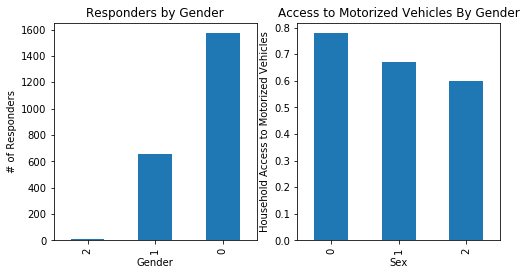

In [4379]:
temp1 = responses["Sex"].value_counts(ascending=True)
print "# of Responders and Their Gender"
print temp1
temp2 = responses.pivot_table(values="Does your household have access to any of the following private motorized vehicles?", index=['Sex'])
print "Effect of Gender on Household access to Motorized Vehicles"
print temp2


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Gender")
ax1.set_ylabel("# of Responders")
ax1.set_title("Responders by Gender")
temp1.plot(kind="bar")


ax2 = fig.add_subplot(122)
ax2.set_xlabel("Gender")
ax2.set_ylabel("Household Access to Motorized Vehicles")
ax2.set_title("Access to Motorized Vehicles By Gender")
temp2.plot(kind="bar")

#### Analysis

There's a few things to note here:

Firstly, there's a visible skew (as mentioned earlier) in the dataset with regards to the gender of responders. Responders are primarily male, whereas the number of females who have answered the survey is less than half the number of males. Even less it the number of responders who identified with the "Other/Unspecified" gender category, amounting to only 10-12 people.

Despite this skew, it's also clear that a slight trend does exist in the data. Males seem to be more likely to have household access to motorized vehicles in comparison to females or other genders. There's a distinct decreasing likelihood of having access to motorized vehicles as you go from Male -> Female -> Other/Unspecified.

This relationship may be void/insignificant considering that the input dataset is skewed, or it may point to basic gender stereotypes that still persist in society today. Food for thought!

### Household Income

Intuitively, one would think that those with larger incomes would generally have access to a private motorized vehicles (as opposed to people who cannot afford them). Let's validate this:

# of Responders and Their Income
0    107
1    238
2    298
4    335
3    386
5    874
Name: What is your household income?, dtype: int64
Effect of Income on Household access to Motorized Vehicles
What is your household income?
0    0.495327
1    0.508403
2    0.637584
3    0.707254
4    0.785075
5    0.881007
Name: Does your household have access to any of the following private motorized vehicles?, dtype: float64


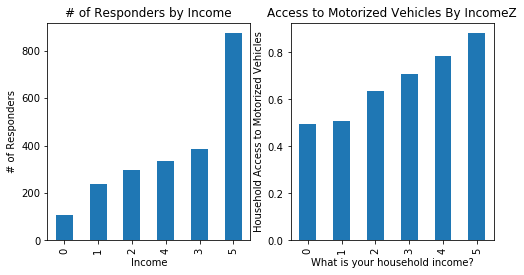

In [4380]:
temp1 = responses["What is your household income?"].value_counts(ascending=True)
print "# of Responders and Their Income"
print temp1
temp2 = responses.pivot_table(values="Does your household have access to any of the following private motorized vehicles?", index=['What is your household income?'])
print "Effect of Income on Household access to Motorized Vehicles"
print temp2


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Income")
ax1.set_ylabel("# of Responders")
ax1.set_title("# of Responders by Income")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Income")
ax2.set_ylabel("Household Access to Motorized Vehicles")
ax2.set_title("Access to Motorized Vehicles By IncomeZ")
temp2.plot(kind="bar")

#### Analysis

Similar to the previous category, we can note two important things here:

The dataset contains an overwhelming amount of responders who have greater than 100K (5) household incomes. In contrast, the percentage of people who responded with annual incomes of 20K or less (0) is much smaller. This points to a similar skew as to the Gender category, and perhaps points to a need to **rebalance the dataset** for more accuarate results.

Having noted this, our initial hypothesis also seems correct. The likelihood of having access to a motorized vehicle definitely increases as the household income of the responder increases. This makes intuitive sense, and is validated by the data.

An interesting thing to check out is whether Education/Employment have the same effect. And if they do, are Education/Employment correlated highly enough with Income such that they can be removed? Let's check it out!

### Education & Employment

Like I said above, it'll be interesting to see if education and employment correlate positively with access to motorized vehicles (intuitively, one would think that they do). Also, if education levels, employment and income are all correlated heavily with each other, we can remove certain features and still maintain model accuracy (while reducing risk of overfitting)!

# of Responders and Their Education Level
0      8
1    195
2    525
4    598
3    912
Name: What level of education have you reached?, dtype: int64
Effect of Education on Household access to Motorized Vehicles
What level of education have you reached?
0    1.000000
1    0.723077
2    0.800000
3    0.740132
4    0.712375
Name: Does your household have access to any of the following private motorized vehicles?, dtype: float64


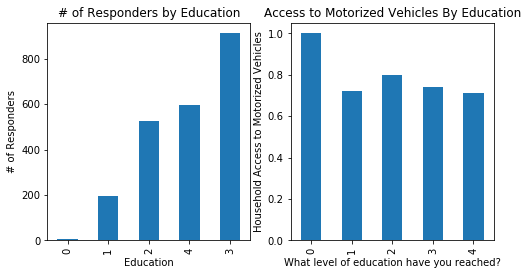

In [4381]:
temp1 = responses["What level of education have you reached?"].value_counts(ascending=True)
print "# of Responders and Their Education Level"
print temp1
temp2 = responses.pivot_table(values="Does your household have access to any of the following private motorized vehicles?", index=['What level of education have you reached?'])
print "Effect of Education on Household access to Motorized Vehicles"
print temp2


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Education")
ax1.set_ylabel("# of Responders")
ax1.set_title("# of Responders by Education")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Education")
ax2.set_ylabel("Household Access to Motorized Vehicles")
ax2.set_title("Access to Motorized Vehicles By Education")
temp2.plot(kind="bar")

This is both really interesting, and slightly unexpected/surprising! 

It seems like having a higher education isn't really a predictor of household access to motorized vehicles. In fact, almost a 100% of people without **any formal education at all** all have access to motorized vehicles (this is greater than any other education category)!

The other aspect that is confirmed however, is that the dataset has a large number of responders that are highly educated (have university degrees). This follows the initial hypothesis/view regarding the dataset.

Let's take a look at Employment, and see if it acts as a strong predictor of household access to motorized vehicles.

# of Responders and Their Employment
0       8
3      17
1      39
4     121
5     124
2     136
6     369
7    1424
Name: Which category best describes your employment?, dtype: int64
Effect of Employment on Household access to Motorized Vehicles
Which category best describes your employment?
0    0.750000
1    0.717949
2    0.875000
3    0.941176
4    0.545455
5    0.637097
6    0.772358
7    0.752107
Name: Does your household have access to any of the following private motorized vehicles?, dtype: float64


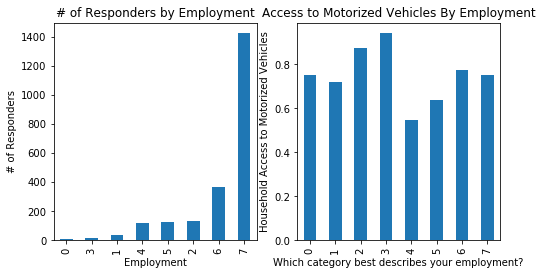

In [4382]:
temp1 = responses["Which category best describes your employment?"].value_counts(ascending=True)
print "# of Responders and Their Employment"
print temp1
temp2 = responses.pivot_table(values="Does your household have access to any of the following private motorized vehicles?", index=['Which category best describes your employment?'])
print "Effect of Employment on Household access to Motorized Vehicles"
print temp2


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Employment")
ax1.set_ylabel("# of Responders")
ax1.set_title("# of Responders by Employment")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Employment")
ax2.set_ylabel("Household Access to Motorized Vehicles")
ax2.set_title("Access to Motorized Vehicles By Employment")
temp2.plot(kind="bar")

Both Education & Employment are surprising findings!

In both cases, an increase (or even a decrease) in the category (whether that's employment or education) doesn't correlate with a corresponding increase/decrease in the likelihood of accessing a motorized vehicle. This means that both categories have a weak correlation with the target variable (and are likely not important features).

The first plot above however does illustrate the general skew in the data, with a large majority of responders working full-time.

### Correlations & Other Features

Having validated and invalidated some of our hypotheses in the initial exploration, we've realized that a key factor is understanding which features correlate largely with the target variable.

This can be understood numerically, with the cross-correlation matrix! Let's take a look:

In [4383]:
responses.corr()

,What age range do you fall in?,Sex,How would you describe your level of physical health?,What level of education have you reached?,What is your household income?,Which category best describes your employment?,What Toronto district is your primary address located in?,On average what distance do you travel most days of the week?,On average how long is your commute?,Which transportation option do you end up using most often?,...,Do you think more should be done to manage trail users who do not respect the 20 km/h speed limit?,Multi-Use Trails - # of Different Motorized Transport Modes Used,Multi-Use Trails - # of Different Non Motorized Transport Modes Used,# of Conflicts Involving Motorized Vehicles,# of Conflicts Not-Involving Motorized Vehicles,Bylaws regarding e-bikes in multi-use trails should be Changed (1) / Maintained (0),Use E-bikes on Toronto's bicycle lanes? Yes (1) / No (0),Bylaws regarding e-bikes in bicycle lanes should be Changed (1) / Maintained (0),"For illegal use of bicycle and e-bikes on sidewalks, the City should Increase (1) / Maintain (0) programs","Regarding the bylaws classifying personal mobility devices as pedestrians, the City of Toronto should Do nothing (0) / Don't Know or Rather Not Answer (1) / Do something (2)"
What age range do you fall in?,1.000000,0.006412,-0.103724,0.009015,0.181057,-0.264547,0.022220,-0.004031,-0.138549,0.056335,...,0.102603,0.146900,0.146900,-0.084142,0.116606,0.047296,0.182263,-0.002914,-0.007692,0.025553
Sex,0.006412,1.000000,-0.012114,0.134807,-0.074559,-0.071993,-0.074865,-0.138081,-0.050728,-0.028060,...,0.100675,-0.056681,-0.056681,-0.062698,-0.001720,-0.009844,-0.044871,0.052972,0.004943,0.041028
How would you describe your level of physical health?,-0.103724,-0.012114,1.000000,0.157833,0.121582,0.117702,-0.037686,0.041604,-0.002223,-0.157179,...,-0.050631,-0.179251,-0.179251,0.150320,0.024412,-0.125912,-0.240232,-0.010464,-0.027029,0.060372
What level of education have you reached?,0.009015,0.134807,0.157833,1.000000,0.209670,0.074801,-0.099242,-0.072648,-0.009243,-0.071900,...,-0.009473,-0.079085,-0.079085,-0.004041,0.022045,-0.054101,-0.109914,0.053409,-0.045715,0.023940
What is your household income?,0.181057,-0.074559,0.121582,0.209670,1.000000,0.283648,0.013920,0.048995,0.001224,0.062980,...,0.023979,-0.076983,-0.076983,0.035448,0.062391,-0.085265,-0.092295,-0.011116,0.038149,0.060224
Which category best describes your employment?,-0.264547,-0.071993,0.117702,0.074801,0.283648,1.000000,-0.067678,0.123362,0.254801,0.017090,...,-0.059993,-0.109255,-0.109255,0.068371,-0.007395,-0.068017,-0.104841,-0.032581,0.039342,0.022667
What Toronto district is your primary address located in?,0.022220,-0.074865,-0.037686,-0.099242,0.013920,-0.067678,1.000000,0.211722,0.065490,0.214666,...,0.015873,0.057252,0.057252,-0.024804,-0.011354,0.035229,0.041668,0.001319,-0.004714,-0.038582
On average what distance do you travel most days of the week?,-0.004031,-0.138081,0.041604,-0.072648,0.048995,0.123362,0.211722,1.000000,0.505610,0.260969,...,-0.069796,0.099457,0.099457,0.022151,-0.012152,0.030347,0.064595,-0.013614,-0.027649,-0.047313
On average how long is your commute?,-0.138549,-0.050728,-0.002223,-0.009243,0.001224,0.254801,0.065490,0.505610,1.000000,0.244189,...,-0.037180,0.001584,0.001584,0.021053,0.014588,0.044567,-0.019273,0.001736,-0.027594,-0.019314
Which transportation option do you end up using most often?,0.056335,-0.028060,-0.157179,-0.071900,0.062980,0.017090,0.214666,0.260969,0.244189,1.000000,...,-0.000121,0.050813,0.050813,-0.075507,-0.030037,0.097199,0.106529,0.002204,0.043081,-0.050804


In [4384]:
responses.corr()["Does your household have access to any of the following private motorized vehicles?"].sort_values()

Sex                                                                                                                                                                             -0.114240
How would you describe your level of physical health?                                                                                                                           -0.082832
Do you support any of the following statements?                                                                                                                                 -0.065423
Regarding the bylaws classifying personal mobility devices as pedestrians, the City of Toronto should Do nothing (0) / Don't Know or Rather Not Answer (1) / Do something (2)   -0.050560
What level of education have you reached?                                                                                                                                       -0.050448
Are you aware that the Multi-Use Paths have a speed limit of 20 km/h? 

#### Analysis

Looking at the above correlation coeffecients, it's easy to determine which features are important in classifying a household's access to motorized vehicles. Larger coeffecients/values indicate a stronger relationship between the feature and target variable, and vice-versa smaller values indicate a weaker/non-existent relationship.

From the results above, it seems like the following variables are strong predictors of whether a household has motorized vehicle access or not:

1. Income
2. Preferred Transportation Option
3. Commute Distance
4. Address / Toronto District
5. Age
6. E-Bike Useage on Bicycle Lanes
7. Multi-Use Trail: Motorized Transport Modes
8. Physical Health

The features that really surprised me, having **weak correlation** were:

1. Education
2. Employment
3. Commute Time

It's also important to note that although there is variance amongst the correlation coeffecients, none of the correlation values are actually that high (indicting **generally weak relationships**). This is important to note, as it likely indicates the format and content of the questions asked in this survey aren't ideal for predecting whether someone has a motorized vehicle or not.

To finish off, let's plot the relationships for Commute Distance, Address and Age!

### Commute Distance, District and Age

Finishing our data exploration, let's take a look at the last few important features

# of Responders and Their Commute Distance
0    196
3    248
4    293
2    653
1    848
Name: On average what distance do you travel most days of the week?, dtype: int64
Effect of Commute Distance on Household access to Motorized Vehicles
On average what distance do you travel most days of the week?
0    0.658163
1    0.678066
2    0.756508
3    0.862903
4    0.880546
Name: Does your household have access to any of the following private motorized vehicles?, dtype: float64


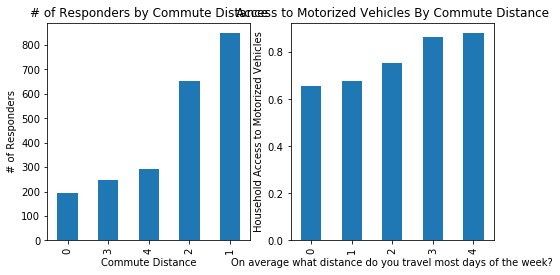

In [4385]:
temp1 = responses["On average what distance do you travel most days of the week?"].value_counts(ascending=True)
print "# of Responders and Their Commute Distance"
print temp1
temp2 = responses.pivot_table(values="Does your household have access to any of the following private motorized vehicles?", index=['On average what distance do you travel most days of the week?'])
print "Effect of Commute Distance on Household access to Motorized Vehicles"
print temp2


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Commute Distance")
ax1.set_ylabel("# of Responders")
ax1.set_title("# of Responders by Commute Distance")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Commute Distance")
ax2.set_ylabel("Household Access to Motorized Vehicles")
ax2.set_title("Access to Motorized Vehicles By Commute Distance")
temp2.plot(kind="bar")

#### Analysis

Just like we predicted, there is a slight upwards trend with regards to household access of motorized vehicles, as commute distance goes up. This makes sense, since with longer distances it becomes harder to travel by walking/bicycle.

Also, the datset seems to favour shorter commutes, with a bulk of entries fall between the 5 - 10 km or 10 - 20 km distances. This is important to realize!

# of Responders and Their Address
0     118
4     120
3     129
2     236
1    1635
Name: What Toronto district is your primary address located in?, dtype: int64
Effect of Address on Household access to Motorized Vehicles
What Toronto district is your primary address located in?
0    0.932203
1    0.677064
2    0.915254
3    0.922481
4    0.983333
Name: Does your household have access to any of the following private motorized vehicles?, dtype: float64


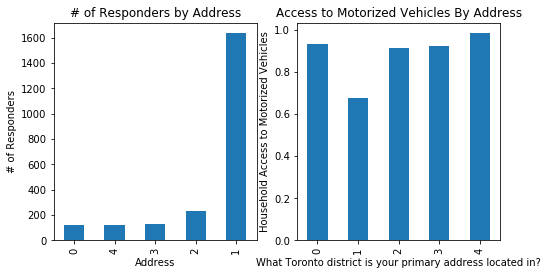

In [4386]:
temp1 = responses["What Toronto district is your primary address located in?"].value_counts(ascending=True)
print "# of Responders and Their Address"
print temp1
temp2 = responses.pivot_table(values="Does your household have access to any of the following private motorized vehicles?", index=['What Toronto district is your primary address located in?'])
print "Effect of Address on Household access to Motorized Vehicles"
print temp2


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Address")
ax1.set_ylabel("# of Responders")
ax1.set_title("# of Responders by Address")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Address")
ax2.set_ylabel("Household Access to Motorized Vehicles")
ax2.set_title("Access to Motorized Vehicles By Address")
temp2.plot(kind="bar")

#### Analysis

Clearly, from the above figures there is a huge majority of responders living in the Central Toronto / East York districts (the Downtown Core). This heavily skews our dataset, since a bulk of those responders likely don't need to commute very far, and thus have access to a motorized vehicle.

This is seen in the second plot, where generally *all* other districts (the remaining 3 inside of Toronto + outside) have a **consistently high likelihood** of having access to a motorized vehicle. Responders living in Central Toronto have a slightly smaller likelihood of accessing motorized vehicles, which makes sense.

# of Responders and Age
0      8
4    111
3    463
1    791
2    865
Name: What age range do you fall in?, dtype: int64
Effect of Age on Household access to Motorized Vehicles
What age range do you fall in?
0    1.000000
1    0.638432
2    0.787283
3    0.814255
4    0.891892
Name: Does your household have access to any of the following private motorized vehicles?, dtype: float64


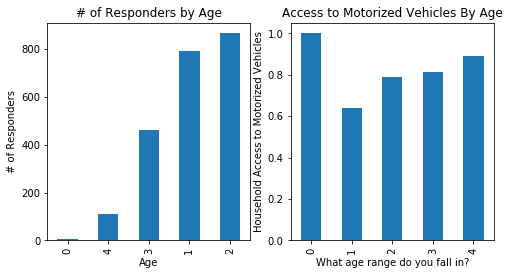

In [4387]:
temp1 = responses["What age range do you fall in?"].value_counts(ascending=True)
print "# of Responders and Age"
print temp1
temp2 = responses.pivot_table(values="Does your household have access to any of the following private motorized vehicles?", index=['What age range do you fall in?'])
print "Effect of Age on Household access to Motorized Vehicles"
print temp2


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Age")
ax1.set_ylabel("# of Responders")
ax1.set_title("# of Responders by Age")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Age")
ax2.set_ylabel("Household Access to Motorized Vehicles")
ax2.set_title("Access to Motorized Vehicles By Age")
temp2.plot(kind="bar")

#### Analysis

Interestingly enough, although the dataset is primarily comprised of people aged between 18 to 49, the subset of younger responders (17 years or younger) almost *all have access to motorized vehicles*. This seems really odd/unintuitive (since 16 is the minimum legal driving age, it seems strange that there are responders within that small age group that have such high access to motorized vehicles).

This can be explained by a few things:

1. Students -> University and Senior high school students in the area may have consistent access to their own / parents' motorized vehicles

2. E-Bikes/Smaller motorized vehicles -> tend to resonate with a younger audience. The increasing trend in motorized e-bikes and electric longboards and other motorized vehicles amongst younger people may be reflected in this data.

3. There may be some outliers (that would need to be filtered), which are skewing the dataset.

Barring the surprising high access that the younger age range has, the trend for the remaining data follows common sense / intuition (older responders are likely more independent, and thus have greater household access to motorized vehicles).

## Modelling & Prediction

Having explored the dataset, and obvserved some of it's biases and relationships, we are now ready to use a machine learning model to fit the data! Considering that this is a supervised learning (labelled dataset) classification task (picking between access/no access), several categorical models come to mind, such as:

1. Logistic Regression
2. Decision Trees
3. Random Forests
4. SVM

It's important to remember that as the model becomes increasingly complex, so does the risk of overfitting and abstraction from results (making our model less interpretable). Remeber: Occam's Razor!

### Logistic Regression

To avoid possible overfitting, let's start with a simple Logistic Regression. To increase the variability with our dataset and further reduce overfitting risk, we will use K-Fold Cross Validation.

In [4388]:
# Import necessary ML models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics

# Create data split
X = np.array(responses.drop("Does your household have access to any of the following private motorized vehicles?", axis = 1))
Y = np.array(responses["Does your household have access to any of the following private motorized vehicles?"])

# Instantiate model
model = LogisticRegression()

# Perform K-Fold cross validation with 5 folds
error = []
kf = KFold(n_splits = 5)

for train_index, test_index in kf.split(X):
    
    # Create training data
    X_train = X[train_index]
    Y_train = Y[train_index]
    
    # Create testing data
    X_test = X[test_index]
    Y_test = Y[test_index]

    # Train the algorithm using the data and the targets
    model.fit(X_train, Y_train)
    
    # Predict
    Y_pred = model.predict(X_test)

print metrics.accuracy_score(Y_test, Y_pred)
print metrics.classification_report(Y_test, Y_pred)

0.821029082774
             precision    recall  f1-score   support

          0       0.55      0.41      0.47        87
          1       0.87      0.92      0.89       360

avg / total       0.81      0.82      0.81       447



#### Analysis

As seen above, the model results are a mixed bag. Before we analyse the results, it's important to observe that the above model utilizes *all* 22 input features. This is an important aspect to note, as it can affect both the results as well as how likely it is that the model is overfitting.

The evaluation metrics are also just as important, which in this case are primarily the classification report (Precision / Recall & F1 Score). Why didn't we just use simple accuracy?

This is because of the **imablance in the dataset!** As seen throughout the analysis, the dataset is **heavily skewed** towards educated, working, high-income males, and has deficiencies in many categories. Thus, traditional accuracy metrics (such as mean square error) do not necessarily offer a correct picture of the model's capabilities. 

Metrics such as **Area-Under-Precision-Recall curve (AUPRC), F1 score or Decision Matrices** are much better, since they consider **Type I and Type II errors** into their calculations.

Regarding the actual results, the reason I think it's a mixed bag is because of the variability in results between the two target classes.

Recall that the original goal was to predict how likely a household was to respond with **No - I do not have access to a private motorized vehicle**. As seen above, the precision and recall performance of the model is *much worse* for the "No"/0 category, than it is for the Yes/1 category. 

This could be very well attributed with the skew in the dataset (noted earlier), and a solution would be a resampled dataset, where all features are relatively equally represented. Further tuning can then be done by playing with the model type + hyperparameters.

For the purpose of experimentation, and because RandomForests in sklearn provide a **Feature Importance Matrix**, let's also implement a RandomForestClassifier!

### Random Forests

In [4389]:
# Import necessary ML models from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

# Create data split
X = np.array(responses.drop("Does your household have access to any of the following private motorized vehicles?", axis = 1))
Y = np.array(responses["Does your household have access to any of the following private motorized vehicles?"])

# Instantiate model
model = RandomForestClassifier()

# Perform K-Fold cross validation with 5 folds
error = []
kf = KFold(n_splits = 5)

for train_index, test_index in kf.split(X):
    
    # Create training data
    X_train = X[train_index]
    Y_train = Y[train_index]
    
    # Create testing data
    X_test = X[test_index]
    Y_test = Y[test_index]

    # Train the algorithm using the data and the targets
    model.fit(X_train, Y_train)
    
    # Predict
    Y_pred = model.predict(X_test)

print metrics.accuracy_score(Y_test, Y_pred)
print metrics.mean_squared_error(Y_test, Y_pred)
print metrics.classification_report(Y_test, Y_pred)

0.805369127517
0.194630872483
             precision    recall  f1-score   support

          0       0.50      0.55      0.52        87
          1       0.89      0.87      0.88       360

avg / total       0.81      0.81      0.81       447



#### Analysis

Although precision/recall have increased for the 'Yes'/1 target class, they have decreased for the 'No'/0 class (which is the actaul result we're after!). This shows that increasing model complexity doesn't necessarily always lead to more accurate / better results.

Let's use the main advantage that RandomForestClassifier's provide, which is the **Feature Importance Matrix**:

In [4390]:
# Create a series with the most important features
featimp = pd.Series(model.feature_importances_, index=responses.drop("Does your household have access to any of the following private motorized vehicles?", axis = 1).columns).sort_values(ascending=False)
print featimp

Which transportation option do you end up using most often?                                                                                                                      0.146466
What is your household income?                                                                                                                                                   0.114153
Do you support any of the following statements?                                                                                                                                  0.086247
On average what distance do you travel most days of the week?                                                                                                                    0.061150
# of Conflicts Not-Involving Motorized Vehicles                                                                                                                                  0.060290
On average how long is your commute?                                  

The **Feature Importance Matrix** essentially provides a list of coeffecients, who's magnitude corresponds to the information gain achieved with each feature (relevant to the final classification). It essentially works as a quality metric for specific features, letting you know which ones are important in the classification process. Note that this matrix, and the correlation matrix from earlier generally agree (although some values are at odds).

As an experiment, let's see if **only using the top 3 features** from this list produces a difference in accuracy/model performance!

In [4391]:
# Import necessary ML models from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

# Create data split
features = ["Which transportation option do you end up using most often?", "What is your household income?", "On average how long is your commute?"]
X = np.array(responses[features])
Y = np.array(responses["Does your household have access to any of the following private motorized vehicles?"])

# Instantiate model
model = RandomForestClassifier()

# Perform K-Fold cross validation with 5 folds
error = []
kf = KFold(n_splits = 5)

for train_index, test_index in kf.split(X):
    
    # Create training data
    X_train = X[train_index]
    Y_train = Y[train_index]
    
    # Create testing data
    X_test = X[test_index]
    Y_test = Y[test_index]

    # Train the algorithm using the data and the targets
    model.fit(X_train, Y_train)
    
    # Predict
    Y_pred = model.predict(X_test)

print metrics.accuracy_score(Y_test, Y_pred)
print metrics.classification_report(Y_test, Y_pred)

0.818791946309
             precision    recall  f1-score   support

          0       0.54      0.46      0.50        87
          1       0.87      0.91      0.89       360

avg / total       0.81      0.82      0.81       447



As seen above, utilizing only 3 features that were important to the classification, we were able to improve both overall performance, as well as the model's ability to classify the negative class (No/0)!

This experiment provides a good look into the feature selection method that can be adopted, if using this model in practice.

## Analysis

Having gone through a majority of the DS process, the final and perhaps most important step is to analyze, and present the results. The following analysis will address 3 main questions:

1. Which models did you consider? Which Model did you choose and why? How good was it?

2. What was the pattern of missing values? Was it random? Could those be inferred from the context?

3. Which features were significant in predicting the target response?

4. If you could re-design the survey for next year, what question(s) would you add or remove in order to improve the precision of the prediction?

Note that almost all the above topics have been covered in detail as the actual DS processes were going on (ie. cleaning, exploration, modelling etc.), however the general findings will be summarized in this section.

Before I discuss the above questions, let's summarize all the assumptions made during the process of analyzing this dataset. They have been mentioned during the analysis, but the complete list has been summarized below:

### Assumptions

1. **Motorized Vehicles:** Car sharing / car rental is a NO (doesn't count as *private* vehicle)
2. **Motorized Vehicles:** Everyone who complained about a lack of multiple options - YES
3. **Physical Health:** Disabled -> Poor -> Fairly Good -> Good -> Very Good -> Excellent
4. **Physical Health:** Disabled/Injured/Illness/Health Impairment category
5. **Gender:** Other/Unspecified category
6. **Education:** Highest level attained
7. **Education:** college degree (not university and not a diploma) -> classified as “University degree”
8. **Education:** Assuming that responders that have put "some university/uni" are graduates from that university
9. **Employment:** Responses like 'None of your business' = unemployed
10. **Employment:** Assuming casual/seasonal employees are still full-time (based on Google search of Employment Rules/Categories)
11. **Preferred Transportation:** Winter transportation option acts as default (for seasonal entries)
12. Groupings for check-list based questions done on the basis that if they answered a "No for all categories", then none of their other responses are considered. Edge cases for these questions have been defaulted to a "No"


### Models

**Which models did you consider?**

As mentioned earlier, since this problem is a supervised learning, classification problem we can chose our model from a given subspace. Increasing in complexity, they are:

1. Logistic Regression
2. Decision Trees
3. Random Forests (Ensemble Decision Trees)
4. SVM (Support Vector Machines)
5. Neural Networks

An important principle is Occam's Razor, which essentially stresses the importance of the simpler solutions. In the case of models, a simpler model has fewer hyperparameters, is less prone to overfitting and generally is more interpretable. Thus, from this subspace of models, I decided to evaluate the performance of a basic Logistic Regression model, and then increase model complexity if necessary!

**Which model did you choose and why?**

Although some of the reasoning is explained above, Logistic Regression is also particularly well suited for categorical classification (like this case). It's essentially standard linear regression, applied to the logistic function (thereby bounding the output between 0 and 1).

A major advantage of this approach is that:

1. Hyperapameters are simple and easy to tune (regularization strength and thresholds)
2. Can output probabilities or hard 1s/0s (probability/likelihood of a "No" is exactly what we want)
3. Model is easy to implement, and interpret (can easily view the coeffecient values)

Thus, the format of the model (as well as it's easy implementation in sklearn), along with the reasons mentioned above made it an ideal first choice!

**How good was it?**

Note that the performance of the models has been evaluated extensively in the analysis portion of the **Modelling & Evaluation** section. However, a quick summary is that the although the model performed relatively well with regards to the overall dataset, it does significantly worse on the negative/"No" target class in comparison to the positive/"Yes" counterpart.

Since the dataset is heavily skewed in terms of the people that responded (primarily educated, high-income Males), the resulting classification is also skewed. To compensate for an imabalanced dataset, evaluation metrics were also changed, utilizing metrics like Area Under the Precision Recall Curve (AUPRC) and F1 score (as opposed to traditional mean squared error). In order to avoid this, the dataset should be **resampled (undersampled) ** to provide a more accurate model. This will be covered in the Recomendations & Conclusion section below.


### Missing Values

**What was the pattern of missing values? Was it random? Could those be inferred from the context?**

Missing values in the dataset tended to occur quite frequently, however there was a pattern that seemed to exist amongst the categories that included missing values. These categories generally related to the **most personal information** (things like Sex, Income, Education, Employment, Residence), which makes sense beacuse there must be responders who are hesitant (for privacy or security concerns) to give away such information via an online survey. 

Notice that the later categories (which had to with e-bike regulation knowledge, Multi-use trails) generally did not have *any missing values* (for the same reason, there is no concern of privacy/secutity giving away your opinion on e-bikes).

There were also common indices/specific sample points that seemed problematic/with the most missing values. Details on how they were inferred are covered specifically during the Data Cleaning segment of this notebook, but essentially the method comprised of two approaches:

1. When a clear majority/skew in the distribution of that category exists, and the number of missing values is small, assume that the missing values equal the majority value. This approach minimizes the change that the missing value has on the dataset, and therefore minimizes any error that comes with a potentially incorrect assumption.

2. When there are a large number of missing values, utilze other categories as context. For example, this was done during the Employment category where Education was used as a prime contextual filtering category. Mimicing the income distribution that specific education levels carried (i.e. "post graduate" tended to have predominantly 100K+ salalries), I was able to essentially follow the distribution and minimze any erroneous impact.

### Significant Features

**Which features were significant in predicting the target response?**

Through a combination of Exploratory Data Analysis (Correlation Matrix) and the Feature Importance Matrix provided by the Random Forest Classifier, we've been able to confidently identify a few features that are extremely significant in predicting the target class. These matrices can be seen in their respective sections, along with their related analyses, however a short summary is as follows:

Using both the Cross-Correlation matrix and Feature Importance Matrix as guidelines, the top 3 most significant features are:

1. Household Income
2. Preferred Mode of Transportation
3. Commute Length/Distance

Conceptually, this also makes sense. Household income dictates affordability of a motorized vehicle, the preferred mode of transportation (especially considering that it was commonly dependent on weather) dictates user preference, and the commute length contributes to the necessity of a motorized vehicle (as opposed to walking or cycling). It's important to note that even the most significant features had relatively weak correlations with the target class, implying that much can be done to improve the survey questions (if an increase in prediction accuracy is the goal).


### Survey Re-Design

**If you could re-design the survey for next year, what question(s) would you add or remove in order to improve the precision of the prediction?**

In terms of increasing the precision of the prediction, we're particularly interested in improving the prediction precision pertaining to the negative target class.

There were quite a few changes that can help increase the performance of the final classification. This includes:

**Removing Questions:** Primarily those that relate to regulation, awareness and e-bikes. Not directly relevant to whether the responder has access to a motorized vehicle or not.

1. "Toronto Bylaws consider personal mobility devices (such as electric wheel chairs) to be pedestrians In your opinion should the City"
2. "With regards to illegal use of bicycles and e-bikes on sidewalks should the City"
3. "Currently any kind of e-bike may use a bicycle lane if they are propelled by pedaling only and those propelled by motor power may be fined"
4. "Currently any kind of e-bike may use a multi-use path if they are propelled by pedaling only and those propelled by motor power may be fined"
5. "Are you aware that the Multi-Use Paths have a speed limit of 20 km/h?"
6. "Do you support any of the following statements?"

**Improving Existing Questions:** Better use of options, formatting etc. can allow for a greater quality of information (and less data cleaning)
1. Household has Access to Motorized Vehicle: Provide the ability to check multiple options (checkbox, not radio buttons). Also include AutoShare/Cars2Go and other ride sharing/car sharing/rental services as options
2. Gender: Provide an Other/Unspecified category
3. Physical Health: Provide a Disabled/Injured category
4. Education: Be specific in the question (either provide a "Student" category, or go with the commonly used "Highest level attained" question). Provide professional certifications as an option.

**Adding New Questions**: These are a few questions that I think may have a greater correlation with the necessity/access to a motorized vehicles
1. Are you married? Relationship Status
2. Do you have any dependents?
3. House Type (Appartment, Home, Studio etc.)
4. Work in Toronto?

Notice that the above questions focus quite a bit on the personal details of the responder. Conceptually, it makes sense that people who are married, and have dependents likely need/access a motorized vehicle more than the average single person. Similar correlations may be detected via home type and the location of their work. Note that these are current estimates for questions, and have not been verified emperically.

## Reccomendations & Conclusion

### Reccomendations
Although this has been covered previously in this analysis, having completed the entire DS process the two largest shortcomings/reccomendations I can point to are:

1. Improving the Survey (covered above)
2. Resampling the Data to improve model performance

The former has been elaborated upon in detail above.

Recall that the survey responses collected heavily skew towards full-time working, educated, high-income males that have access to motorized vehicles. This imbalance impacts the resulting model classification, since the model begins to "learn" exaggerated positively correlated relationships. The solution to this problem would be to **resample** the dataset (and in this case, it means undersampling the classes that are present in abundance). Thus, it would be necessary to filter out some of the samples that correspond to this majority (full-time working, educated male) and thereby balance out the dataset.

Using this balanced, resampled version should yield a drastic improvement in the model's performance!

Other, minor reccomendations include removing duplication in the code by abstracting certain pieces to their own functions (it was kept since the notebook serves more as a demonstration rather than an actual production codebase) and increase the amount of time spent during hyperparameter tuning. Having access to the original survey would also help add more context during the cleaning process!

### Conclusion

I really enjoyed going through this problem! Having gotten the chance to work with real data and responses, and then go through the entire Clean -> Explore -> Model -> Analyse Data Science pipeline was a fascinating experience. The variability in responses was immense, and the experience of dealing with that variability is impossible to gain through a side project or tutorial.

I'm excited to get feedback on my work here, and learn how I can do better + leverage similar skills to help companies like Shopify! Thanks so much for the opportunity!